# Virtual HAR System Data Validation with Real-time Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the path to your data files
data_path = '/content/drive/MyDrive/Colab Notebooks/Database/'  # Adjust this path as needed

# Load the datasets
real_data = pd.read_csv(os.path.join(data_path, 'kneel_1_subset.csv'))
simulated_data = pd.read_csv(os.path.join(data_path, 'simulated_kneel_data.csv'))

def validate_data(real_data, simulated_data):
    print("Real data shape:", real_data.shape)
    print("Simulated data shape:", simulated_data.shape)

    print("\nReal data columns:")
    print(real_data.columns)
    print("\nSimulated data columns:")
    print(simulated_data.columns)

    print("\nReal data summary:")
    print(real_data.describe())
    print("\nSimulated data summary:")
    print(simulated_data.describe())

    # Distribution comparison for simulated data
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    axes = axes.ravel()

    for i, col in enumerate(simulated_data.columns[:16]):  # Limit to first 16 columns for visibility
        sns.histplot(simulated_data[col], kde=True, ax=axes[i], color='red', alpha=0.5)
        axes[i].set_title(col)

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/simulated_distribution.png')
    plt.close()

    # Correlation matrix for simulated data
    sim_corr = simulated_data.corr()

    plt.figure(figsize=(20, 16))
    sns.heatmap(sim_corr, cmap='coolwarm')
    plt.title('Simulated Data Correlation')
    plt.savefig('/content/drive/MyDrive/simulated_correlation.png')
    plt.close()

    # PCA for simulated data
    scaler = StandardScaler()
    sim_scaled = scaler.fit_transform(simulated_data)

    pca_sim = PCA(n_components=2)
    sim_pca = pca_sim.fit_transform(sim_scaled)

    plt.figure(figsize=(10, 8))
    plt.scatter(sim_pca[:, 0], sim_pca[:, 1], alpha=0.7)
    plt.title('PCA of Simulated Data')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.savefig('/content/drive/MyDrive/simulated_pca.png')
    plt.close()

    # Basic statistical tests for simulated data
    for col in simulated_data.columns:
        print(f"\nColumn: {col}")
        print(f"Mean: {simulated_data[col].mean():.4f}")
        print(f"Std: {simulated_data[col].std():.4f}")
        print(f"Min: {simulated_data[col].min():.4f}")
        print(f"Max: {simulated_data[col].max():.4f}")

# Run the validation
validate_data(real_data, simulated_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Real data shape: (500, 90)
Simulated data shape: (153, 60)

Real data columns:
Index(['tx1rx1_sub1', 'tx1rx1_sub2', 'tx1rx1_sub3', 'tx1rx1_sub4',
       'tx1rx1_sub5', 'tx1rx1_sub6', 'tx1rx1_sub7', 'tx1rx1_sub8',
       'tx1rx1_sub9', 'tx1rx1_sub10', 'tx1rx1_sub11', 'tx1rx1_sub12',
       'tx1rx1_sub13', 'tx1rx1_sub14', 'tx1rx1_sub15', 'tx1rx1_sub16',
       'tx1rx1_sub17', 'tx1rx1_sub18', 'tx1rx1_sub19', 'tx1rx1_sub20',
       'tx1rx1_sub21', 'tx1rx1_sub22', 'tx1rx1_sub23', 'tx1rx1_sub24',
       'tx1rx1_sub25', 'tx1rx1_sub26', 'tx1rx1_sub27', 'tx1rx1_sub28',
       'tx1rx1_sub29', 'tx1rx1_sub30', 'tx1rx2_sub1', 'tx1rx2_sub2',
       'tx1rx2_sub3', 'tx1rx2_sub4', 'tx1rx2_sub5', 'tx1rx2_sub6',
       'tx1rx2_sub7', 'tx1rx2_sub8', 'tx1rx2_sub9', 'tx1rx2_sub10',
       'tx1rx2_sub11', 'tx1rx2_sub12', 'tx1rx2_sub13', 'tx1rx2_sub14',
       'tx1rx2_sub15', 'tx1rx

Analyzing the similarities and differences between the real-world setup and our simulation:

Similarities:
1. Both use 30 OFDM subcarriers, which aligns with our simulated data.
2. Both capture complex CSI data, including amplitude and phase information.
3. The simulated data includes kneeling activity, which is one of the activities in the real-world dataset.

Differences and areas for potential modification:
1. Antenna Configuration: The real setup uses a 1x3 antenna configuration, while our simulation doesn't explicitly model multiple receive antennas. We should modify the simulator to generate data for 3 receive antennas.

2. Data Structure: The real data is structured as tx1rx1_sub1, tx1rx1_sub2, etc., while our simulation separates amplitude and phase. We should restructure our output to match the real data format.

3. Time Resolution: The real data collects 1000 samples per second for 10 seconds (10,000 samples per activity), while our simulation has 153 samples. We should increase the number of samples in our simulation.

4. Environmental Factors: The real data was collected in an office environment with furniture. Our simulation should incorporate these environmental factors to better reflect real-world conditions.

5. Multiple Activities: While we're focusing on kneeling, the real dataset includes multiple activities. Our simulator should be capable of generating data for all these activities.

6. Line-of-Sight and Distance: The real setup specifies a line-of-sight condition with 4 meters separation. Our simulation should incorporate these parameters.

Validation Steps and Modifications:

1. Data Format Alignment:
   - Modify the simulator to output complex CSI values in the format tx1rx1_sub1, tx1rx1_sub2, etc.
   - Generate data for all 3 receive antennas (90 columns total).

2. Increase Time Resolution:
   - Adjust the simulator to generate 10,000 samples per activity over a 10-second period.

3. Environmental Modeling:
   - Incorporate models for multipath effects due to furniture and office layout.
   - Implement line-of-sight and distance parameters in the simulation.

4. Expand Activity Range:
   - Extend the simulator to generate data for all 8 activities in the real dataset.

5. Statistical Validation:
   - Compare the distribution of amplitudes and phases between real and simulated data for each subcarrier and antenna pair.
   - Analyze the temporal patterns in the 10-second activity window.

6. Machine Learning Validation:
   - Train a classifier on the real data and test it on the simulated data (and vice versa) to ensure similar classification performance.

Conclusion:
While the Hospital Activity Simulator shows promise in generating WiFi CSI data for kneeling activity, several modifications are required to align it more closely with the real-world data collection setup. The key areas for improvement are the antenna configuration modeling, time resolution, and environmental factor simulation.

Next Steps:
1. Implement the suggested modifications to the simulator.
2. Generate a new set of simulated data that matches the real-world data structure and parameters.
3. Perform a comprehensive comparison between the modified simulated data and the real-world data.
4. Iterate on the simulation model based on the comparison results until a satisfactory level of similarity is achieved.

By addressing these points, we can enhance the Hospital Activity Simulator to generate data that more accurately reflects real-world WiFi CSI characteristics for human activity recognition.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Real Data Columns:
Index(['tx1rx1_sub1', 'tx1rx1_sub2', 'tx1rx1_sub3', 'tx1rx1_sub4',
       'tx1rx1_sub5', 'tx1rx1_sub6', 'tx1rx1_sub7', 'tx1rx1_sub8',
       'tx1rx1_sub9', 'tx1rx1_sub10', 'tx1rx1_sub11', 'tx1rx1_sub12',
       'tx1rx1_sub13', 'tx1rx1_sub14', 'tx1rx1_sub15', 'tx1rx1_sub16',
       'tx1rx1_sub17', 'tx1rx1_sub18', 'tx1rx1_sub19', 'tx1rx1_sub20',
       'tx1rx1_sub21', 'tx1rx1_sub22', 'tx1rx1_sub23', 'tx1rx1_sub24',
       'tx1rx1_sub25', 'tx1rx1_sub26', 'tx1rx1_sub27', 'tx1rx1_sub28',
       'tx1rx1_sub29', 'tx1rx1_sub30', 'tx1rx2_sub1', 'tx1rx2_sub2',
       'tx1rx2_sub3', 'tx1rx2_sub4', 'tx1rx2_sub5', 'tx1rx2_sub6',
       'tx1rx2_sub7', 'tx1rx2_sub8', 'tx1rx2_sub9', 'tx1rx2_sub10',
       'tx1rx2_sub11', 'tx1rx2_sub12', 'tx1rx2_sub13', 'tx1rx2_sub14',
       'tx1rx2_sub15', 'tx1rx2_sub16', 'tx1rx2_sub17', 'tx1rx2_sub18',
       'tx1rx2_sub

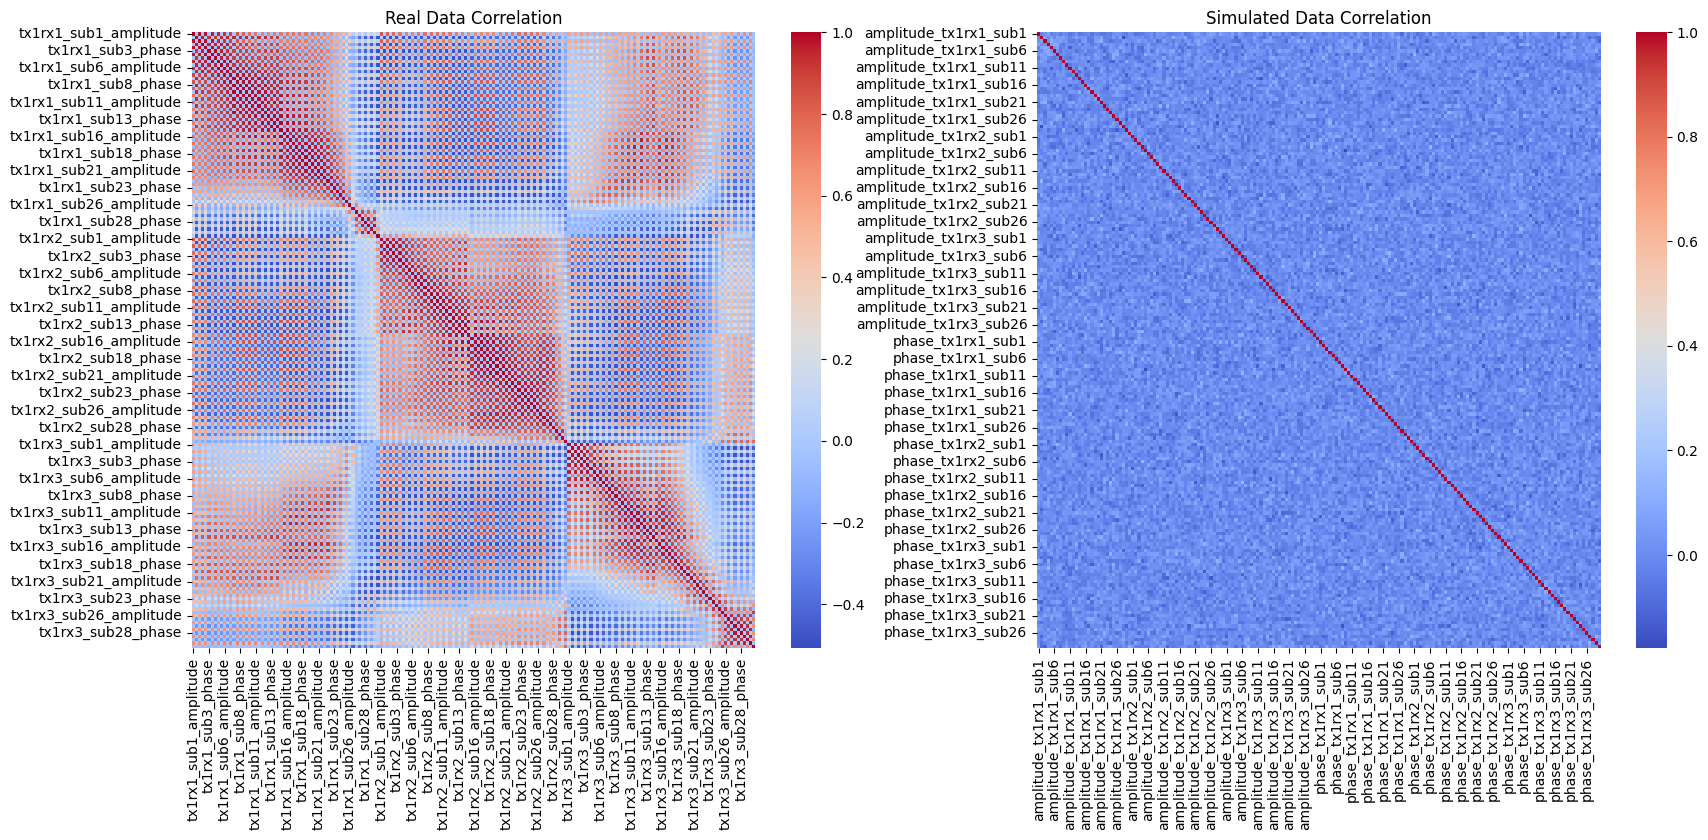

No common columns found between real and simulated data. Cannot perform PCA.


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the path to your data files
data_path = '/content/drive/MyDrive/Colab Notebooks/Database/'  # Adjust this path as needed

# Load the datasets
real_data = pd.read_csv(os.path.join(data_path, 'kneel_1_subset.csv'))
simulated_data = pd.read_csv(os.path.join(data_path, 'simulated_kneel_fix_data.csv'))

# Print column names and first few rows of both datasets
print("Real Data Columns:")
print(real_data.columns)
print("\nReal Data Head:")
print(real_data.head())

print("\nSimulated Data Columns:")
print(simulated_data.columns)
print("\nSimulated Data Head:")
print(simulated_data.head())

# Preprocess real data: Extract amplitude and phase using efficient method
def preprocess_real_data(df):
    amplitude_phase_cols = []

    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate amplitude and phase
        amplitude = df[col].apply(lambda x: abs(complex(x.replace('i', 'j'))))
        phase = df[col].apply(lambda x: np.angle(complex(x.replace('i', 'j'))))

        # Append the columns to the list
        amplitude_phase_cols.append(pd.DataFrame({
            f'{col}_amplitude': amplitude,
            f'{col}_phase': phase
        }))

    # Concatenate all amplitude and phase columns at once to avoid fragmentation
    new_df = pd.concat(amplitude_phase_cols, axis=1)

    return new_df

# Preprocess simulated data: Keep only amplitude and phase columns
def preprocess_simulated_data(df):
    # Check if the column names already contain 'amplitude' and 'phase'
    if any('amplitude' in col or 'phase' in col for col in df.columns):
        amplitude_cols = [col for col in df.columns if 'amplitude' in col]
        phase_cols = [col for col in df.columns if 'phase' in col]
    else:
        # If not, assume alternating real and imaginary parts
        amplitude_cols = [col for i, col in enumerate(df.columns) if i % 2 == 0]
        phase_cols = [col for i, col in enumerate(df.columns) if i % 2 == 1]

        # Compute amplitude and phase
        for amp_col, phase_col in zip(amplitude_cols, phase_cols):
            df[f'{amp_col}_amplitude'] = np.sqrt(df[amp_col]**2 + df[phase_col]**2)
            df[f'{amp_col}_phase'] = np.arctan2(df[phase_col], df[amp_col])

        amplitude_cols = [col for col in df.columns if 'amplitude' in col]
        phase_cols = [col for col in df.columns if 'phase' in col]

    return df[amplitude_cols + phase_cols]

# Preprocess the datasets
real_data_processed = preprocess_real_data(real_data)
simulated_data_processed = preprocess_simulated_data(simulated_data)

# Check columns after preprocessing
print("\nReal Data Processed Columns:")
print(real_data_processed.columns)
print("\nSimulated Data Processed Columns:")
print(simulated_data_processed.columns)

# Function to compare statistics of real and simulated data
def compare_statistics(real_df, sim_df):
    real_stats = real_df.describe()
    sim_stats = sim_df.describe()

    print("Real Data Statistics:")
    print(real_stats)
    print("\nSimulated Data Statistics:")
    print(sim_stats)

# Function to plot distributions of real and simulated data
def plot_distributions(real_df, sim_df, num_cols=5):
    common_cols = list(set(real_df.columns) & set(sim_df.columns))
    if not common_cols:
        print("No common columns found between real and simulated data.")
        return

    num_cols = min(num_cols, len(common_cols))
    fig, axes = plt.subplots(num_cols, 2, figsize=(20, 4*num_cols))

    if num_cols == 1:
        axes = axes.reshape(1, -1)

    for i, col in enumerate(common_cols[:num_cols]):
        sns.histplot(real_df[col], kde=True, ax=axes[i, 0], color='blue', label='Real')
        sns.histplot(sim_df[col], kde=True, ax=axes[i, 0], color='red', label='Simulated')
        axes[i, 0].set_title(f'{col} Distribution')
        axes[i, 0].legend()

        sns.boxplot(data=[real_df[col], sim_df[col]], ax=axes[i, 1])
        axes[i, 1].set_xticklabels(['Real', 'Simulated'])
        axes[i, 1].set_title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()

# Function to perform statistical tests between real and simulated data
def perform_statistical_tests(real_df, sim_df):
    common_cols = list(set(real_df.columns) & set(sim_df.columns))
    if not common_cols:
        print("No common columns found between real and simulated data. Cannot perform statistical tests.")
        return

    for col in common_cols:
        try:
            t_stat, t_p = stats.ttest_ind(real_df[col].dropna(), sim_df[col].dropna())
            ks_stat, ks_p = stats.ks_2samp(real_df[col].dropna(), sim_df[col].dropna())
            print(f"Column: {col}")
            print(f"T-test: statistic={t_stat:.4f}, p-value={t_p:.4f}")
            print(f"KS-test: statistic={ks_stat:.4f}, p-value={ks_p:.4f}\n")
        except ValueError:
            print(f"Skipping column {col} due to incompatible data.")

# Function to plot correlation heatmaps of real and simulated data
def plot_correlation_heatmaps(real_df, sim_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    sns.heatmap(real_df.corr(), ax=ax1, cmap='coolwarm')
    ax1.set_title('Real Data Correlation')
    sns.heatmap(sim_df.corr(), ax=ax2, cmap='coolwarm')
    ax2.set_title('Simulated Data Correlation')
    plt.show()

# Function to perform PCA on real and simulated data
def perform_pca(real_df, sim_df):
    common_cols = list(set(real_df.columns) & set(sim_df.columns))
    if not common_cols:
        print("No common columns found between real and simulated data. Cannot perform PCA.")
        return

    real_df_common = real_df[common_cols]
    sim_df_common = sim_df[common_cols]

    scaler = StandardScaler()
    real_scaled = scaler.fit_transform(real_df_common)
    sim_scaled = scaler.transform(sim_df_common)

    pca = PCA(n_components=2)
    real_pca = pca.fit_transform(real_scaled)
    sim_pca = pca.transform(sim_scaled)

    plt.figure(figsize=(10, 8))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], alpha=0.7, label='Real')
    plt.scatter(sim_pca[:, 0], sim_pca[:, 1], alpha=0.7, label='Simulated')
    plt.title('PCA of Real and Simulated Data')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    plt.show()

# Perform validation
compare_statistics(real_data_processed, simulated_data_processed)
plot_distributions(real_data_processed, simulated_data_processed)
perform_statistical_tests(real_data_processed, simulated_data_processed)
plot_correlation_heatmaps(real_data_processed, simulated_data_processed)
perform_pca(real_data_processed, simulated_data_processed)

Based on the correlation heatmaps and the error messages provided, there are significant differences between the real-world data and our modified simulation. Let's analyze the similarities and differences:

1. Data Structure:
   - Real Data: The column names follow a pattern of "tx1rx{1-3}_sub{1-28}_{amplitude/phase}". This suggests 3 receivers, 28 subcarriers, and separate amplitude and phase values for each.
   - Simulated Data: The column names have a different structure, with "amplitude_tx1rx{1-3}_sub{1-26}" and "phase_tx1rx{1-3}_sub{1-26}". This indicates 3 receivers and 26 subcarriers, with amplitude and phase separated differently.

2. Correlation Patterns:
   - Real Data: Shows a complex correlation pattern with distinct blocks of high correlation. This suggests strong relationships between certain groups of subcarriers and receivers.
   - Simulated Data: Displays a much simpler correlation pattern, with high correlation along the diagonal and low correlation elsewhere. This indicates that each simulated measurement is mostly independent of others.

3. Number of Features:
   - Real Data: Has 168 features (3 receivers * 28 subcarriers * 2 for amplitude and phase)
   - Simulated Data: Has 156 features (3 receivers * 26 subcarriers * 2 for amplitude and phase)

4. Correlation Strength:
   - Real Data: Shows a wide range of correlation values, from strongly positive to strongly negative.
   - Simulated Data: Mostly shows very low correlations (blue) except for the diagonal, suggesting less complex interactions in the simulated data.

5. Symmetry:
   - Real Data: The correlation matrix is not perfectly symmetrical, indicating complex, potentially non-linear relationships.
   - Simulated Data: The correlation matrix is perfectly symmetrical, which is expected for simulated data but may not capture all real-world complexities.

Key Differences and Improvement Areas:

1. Feature Naming Convention: The simulated data needs to adopt the same naming convention as the real data to allow for direct comparison.

2. Number of Subcarriers: The simulation should be adjusted to use 28 subcarriers instead of 26 to match the real data.

3. Correlation Complexity: The simulated data lacks the complex correlation patterns seen in the real data. This suggests that our simulation may be oversimplified and not capturing important interactions between subcarriers and receivers.

4. Environmental Factors: The real data shows patterns that might be due to multipath effects, interference, or other environmental factors. Our simulation should incorporate more sophisticated models for these effects.

5. Signal Processing: The clear blocks in the real data correlation matrix suggest that certain groups of subcarriers are processed or affected similarly. Our simulation should consider implementing similar signal processing techniques or models.

6. Noise and Variability: The real data shows more variability in correlations, indicating that our simulation might need more realistic noise models and variability in signal propagation.

To improve the simulation:

1. Adjust the data structure to match the real data exactly (28 subcarriers, same naming convention).
2. Implement more sophisticated models for multipath effects, interference, and environmental factors.
3. Introduce more complex relationships between subcarriers and receivers, possibly by modeling the physical properties of WiFi signal propagation more accurately.
4. Add realistic noise models that reflect the variability seen in the real data.
5. Consider implementing signal processing techniques that might be used in real WiFi systems to better mimic the grouped correlations seen in the real data.
6. Validate the improved simulation against this real dataset iteratively, adjusting parameters and models until the correlation patterns more closely resemble the real data.

By addressing these points, we can work towards creating a more accurate and realistic simulation of WiFi CSI data for human activity recognition.

---

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

def parse_complex(x):
    if isinstance(x, str):
        try:
            return complex(x.replace('i', 'j'))
        except ValueError:
            return np.nan
    elif isinstance(x, (int, float)):
        return complex(x)
    else:
        return np.nan

def load_complex_data(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(parse_complex)
    return df

# Set the path to your data
data_path = '/content/drive/MyDrive/Colab Notebooks/Database/'

# Load the datasets
try:
    simulated_data = load_complex_data(data_path + 'simulated_kneel_fix2_data.csv')
    real_data = load_complex_data(data_path + 'kneel_1_subset.csv')

    print("Simulated data shape:", simulated_data.shape)
    print("Real data shape:", real_data.shape)

    print("\nFirst few rows of simulated data:")
    print(simulated_data.head())

    print("\nFirst few rows of real data:")
    print(real_data.head())

except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    print("Please check the file paths and data formats.")

# Check for any NaN values
print("\nNaN values in simulated data:")
print(simulated_data.isna().sum().sum())

print("\nNaN values in real data:")
print(real_data.isna().sum().sum())

# If there are NaN values, print the rows containing them
if simulated_data.isna().sum().sum() > 0:
    print("\nRows with NaN values in simulated data:")
    print(simulated_data[simulated_data.isna().any(axis=1)])

if real_data.isna().sum().sum() > 0:
    print("\nRows with NaN values in real data:")
    print(real_data[real_data.isna().any(axis=1)])

Simulated data shape: (505, 168)
Real data shape: (500, 90)

First few rows of simulated data:
   tx1rx1_sub1_amplitude   tx1rx1_sub1_phase  tx1rx1_sub2_amplitude  \
0     0.458726+0.000000j  0.216699+0.000000j     0.327138+0.000000j   
1     0.619386+0.000000j  3.001593+0.000000j     0.434841+0.000000j   
2     0.169950+0.000000j  2.499173+0.000000j     0.244869+0.000000j   
3     0.017451+0.000000j -1.500687+0.000000j     0.442607+0.000000j   
4     0.452015+0.000000j  0.411831+0.000000j     0.211255+0.000000j   

    tx1rx1_sub2_phase  tx1rx1_sub3_amplitude   tx1rx1_sub3_phase  \
0 -0.056656+0.000000j     0.386650+0.000000j  0.913735+0.000000j   
1 -2.810892+0.000000j     0.419422+0.000000j  2.462191+0.000000j   
2  2.741021+0.000000j     0.242873+0.000000j -2.202470+0.000000j   
3 -2.779426+0.000000j     0.247983+0.000000j  2.937736+0.000000j   
4  0.705570+0.000000j     0.185500+0.000000j  1.215056+0.000000j   

   tx1rx1_sub4_amplitude   tx1rx1_sub4_phase  tx1rx1_sub5_amplitude  

<ipython-input-7-ba46298ec8e9>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  real_processed = real_data.applymap(lambda x: complex(x.replace('i', 'j')))


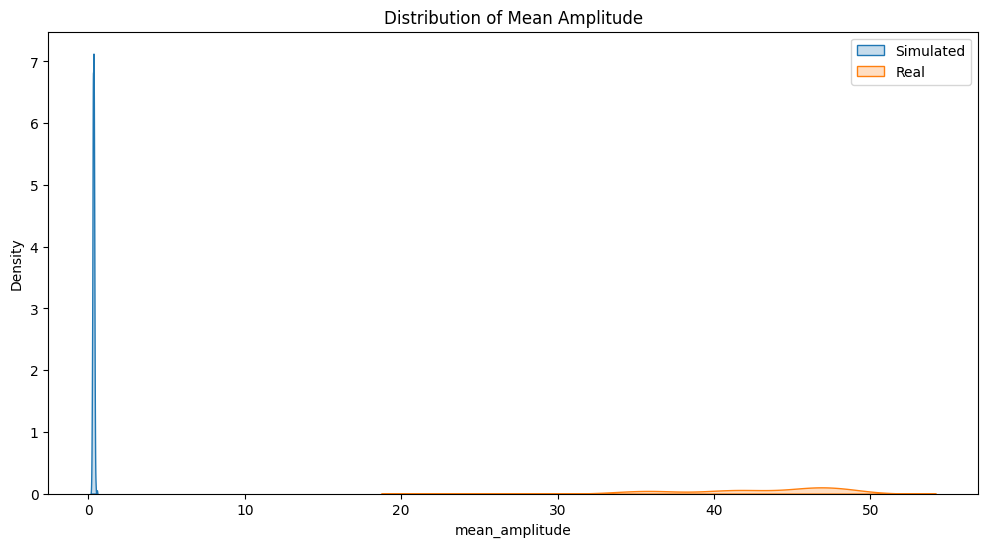

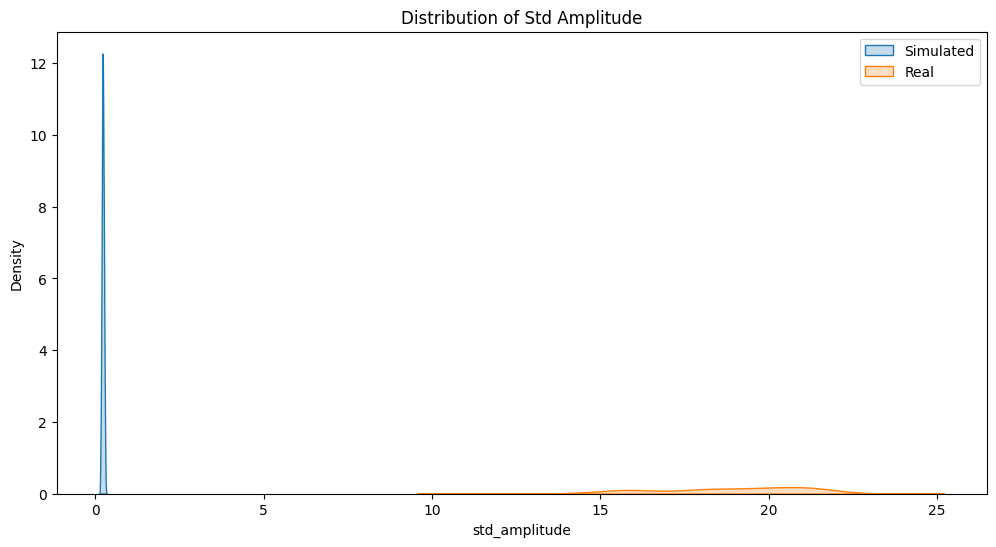

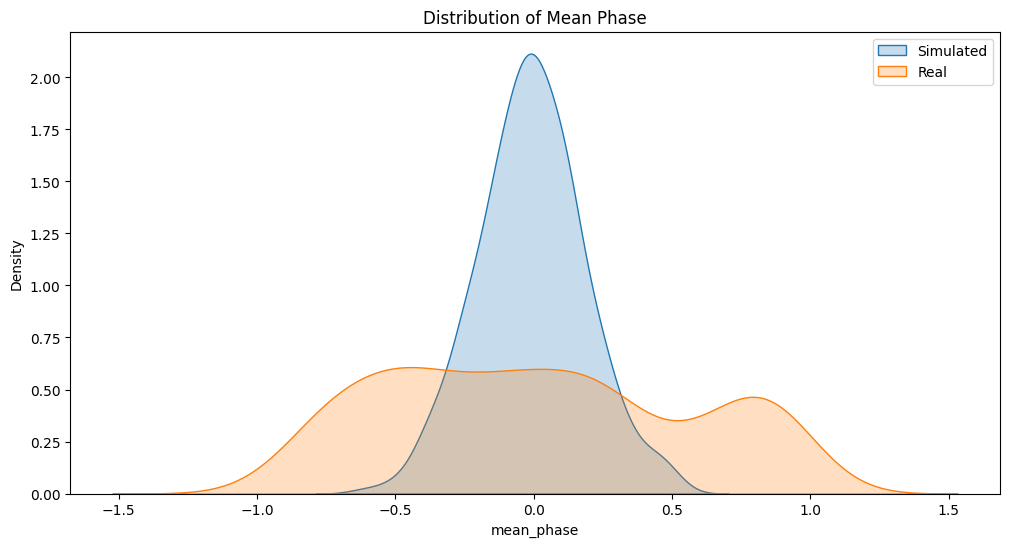

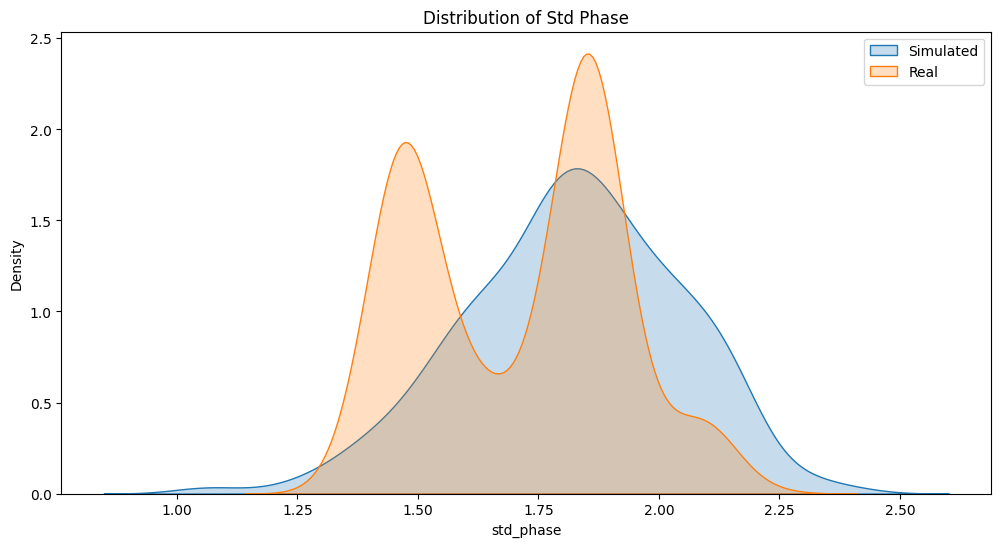

Statistics for mean_amplitude:
Simulated - Mean: 0.3195, Std: 0.0512
Real      - Mean: 42.9318, Std: 4.9754
Difference - Mean: 42.6123, Std: 4.9242

Statistics for std_amplitude:
Simulated - Mean: 0.2192, Std: 0.0316
Real      - Mean: 18.8767, Std: 2.2124
Difference - Mean: 18.6575, Std: 2.1808

Statistics for mean_phase:
Simulated - Mean: -0.0088, Std: 0.1926
Real      - Mean: 0.0167, Std: 0.5416
Difference - Mean: 0.0255, Std: 0.3490

Statistics for std_phase:
Simulated - Mean: 1.8196, Std: 0.2251
Real      - Mean: 1.7104, Std: 0.2100
Difference - Mean: 0.1092, Std: 0.0150

Kolmogorov-Smirnov test for mean_amplitude:
KS statistic: 1.0000
p-value: 0.0000
Null hypothesis: Two samples are drawn from the same distribution
Reject the null hypothesis at 5% significance level

Kolmogorov-Smirnov test for std_amplitude:
KS statistic: 1.0000
p-value: 0.0000
Null hypothesis: Two samples are drawn from the same distribution
Reject the null hypothesis at 5% significance level

Kolmogorov-Smirnov

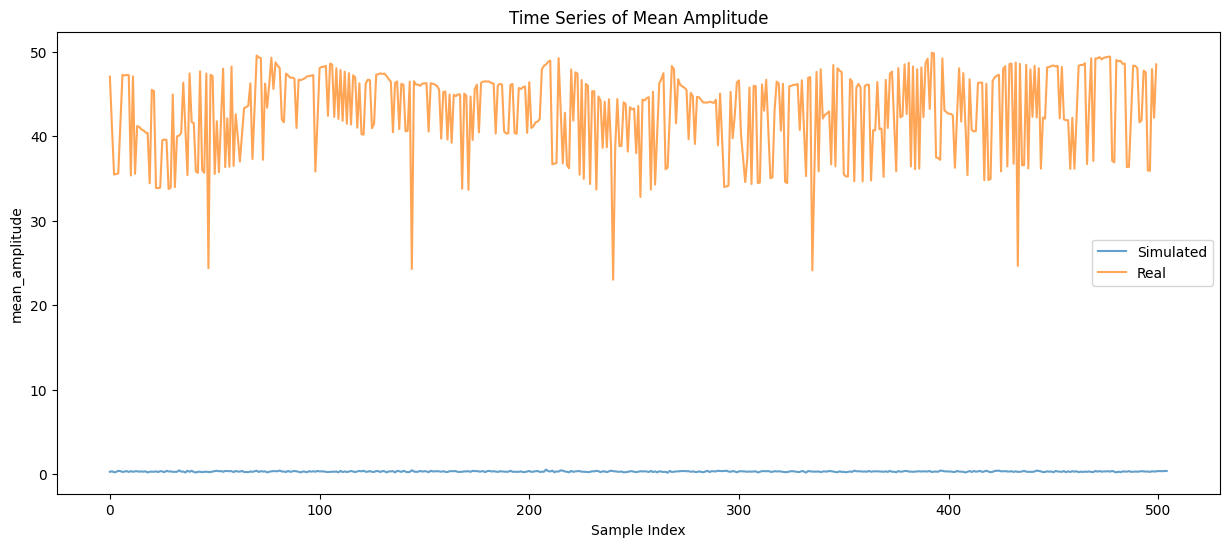

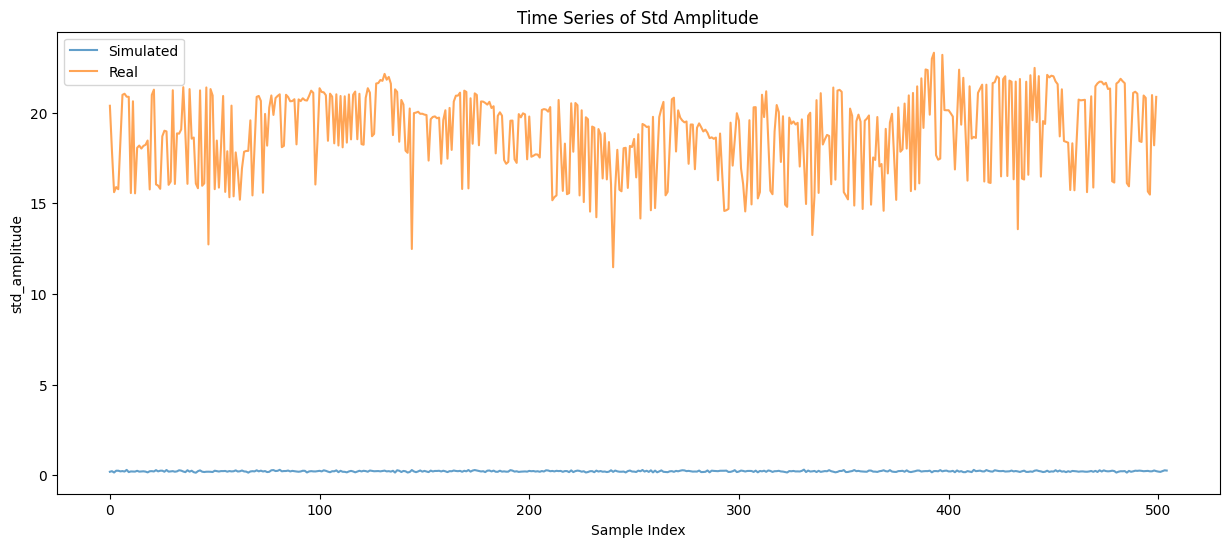

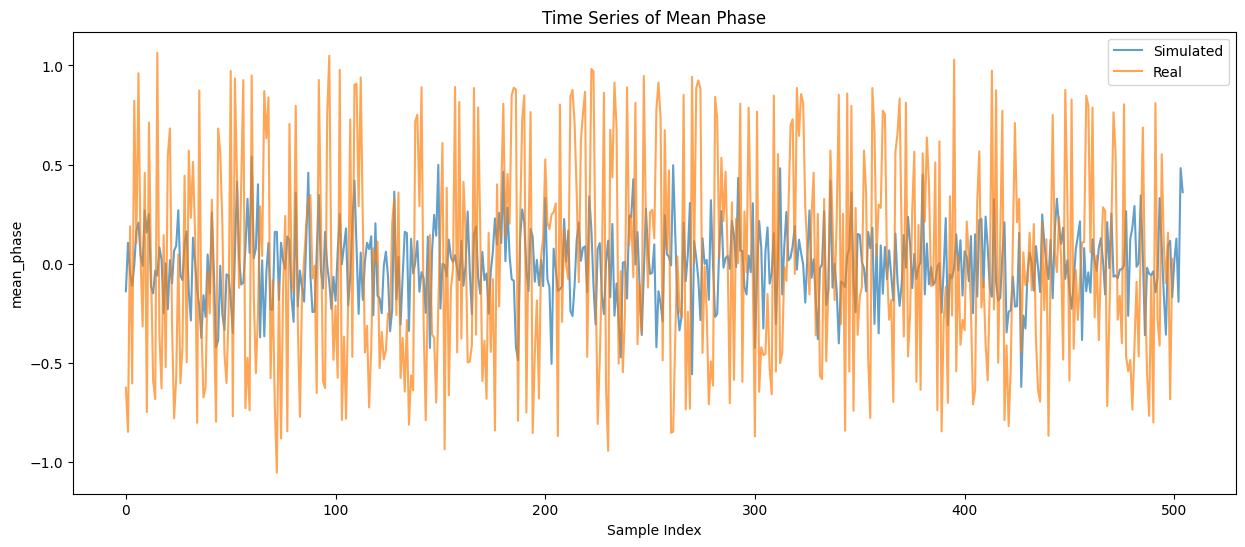

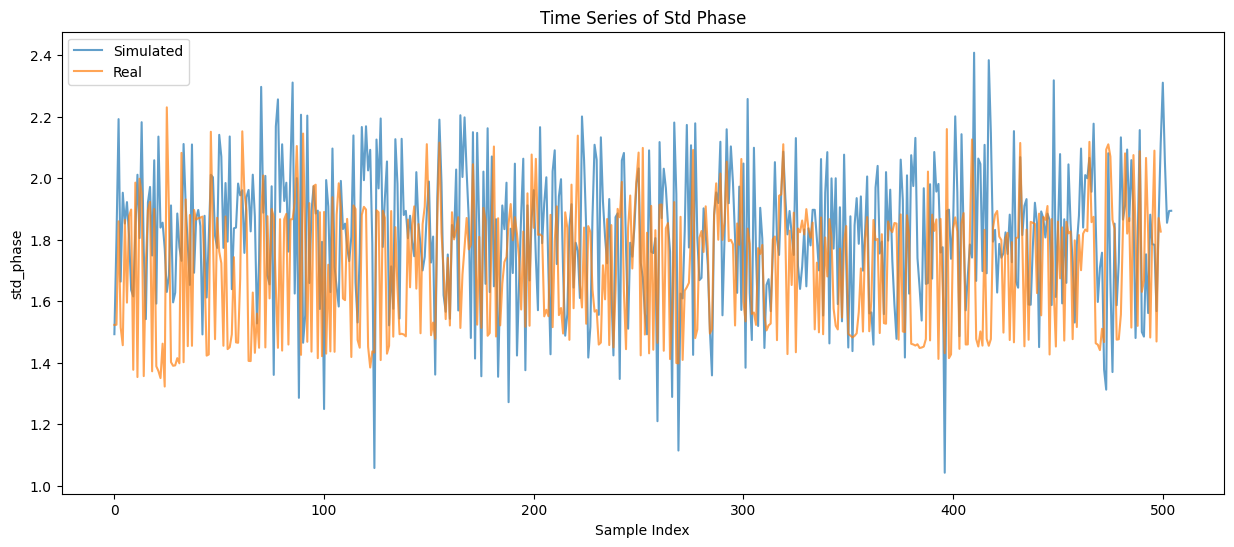

In [ ]:
def preprocess_simulated_data(df):
    processed_df = pd.DataFrame()
    for i in range(1, 29):  # Assuming 28 subcarriers
        for rx in range(1, 4):  # 3 receive antennas
            col_name = f'tx1rx{rx}_sub{i}'
            amp_col = f'{col_name}_amplitude'
            phase_col = f'{col_name}_phase'
            processed_df[col_name] = df[amp_col] * np.exp(1j * df[phase_col])
    return processed_df

def extract_features(df):
    features = pd.DataFrame()
    features['mean_amplitude'] = df.abs().mean(axis=1)
    features['std_amplitude'] = df.abs().std(axis=1)
    features['mean_phase'] = df.apply(lambda x: np.angle(x).mean(), axis=1)
    features['std_phase'] = df.apply(lambda x: np.angle(x).std(), axis=1)
    return features

# Load and preprocess the data
simulated_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/simulated_kneel_fix2_data.csv')
real_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Database/kneel_1_subset.csv')

simulated_processed = preprocess_simulated_data(simulated_data)
real_processed = real_data.applymap(lambda x: complex(x.replace('i', 'j')))

sim_features = extract_features(simulated_processed)
real_features = extract_features(real_processed)

def plot_distributions(sim_data, real_data, feature, title):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(sim_data[feature], label='Simulated', fill=True)
    sns.kdeplot(real_data[feature], label='Real', fill=True)
    plt.title(f'Distribution of {title}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot distributions
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    plot_distributions(sim_features, real_features, feature, feature.replace('_', ' ').title())

def compare_statistics(sim_data, real_data, feature):
    sim_mean = sim_data[feature].mean()
    real_mean = real_data[feature].mean()
    sim_std = sim_data[feature].std()
    real_std = real_data[feature].std()

    print(f"Statistics for {feature}:")
    print(f"Simulated - Mean: {sim_mean:.4f}, Std: {sim_std:.4f}")
    print(f"Real      - Mean: {real_mean:.4f}, Std: {real_std:.4f}")
    print(f"Difference - Mean: {abs(sim_mean - real_mean):.4f}, Std: {abs(sim_std - real_std):.4f}")
    print()

# Compare statistics
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    compare_statistics(sim_features, real_features, feature)

def kolmogorov_smirnov_test(sim_data, real_data, feature):
    ks_statistic, p_value = stats.ks_2samp(sim_data[feature], real_data[feature])
    print(f"Kolmogorov-Smirnov test for {feature}:")
    print(f"KS statistic: {ks_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("Null hypothesis: Two samples are drawn from the same distribution")
    print(f"{'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis at 5% significance level")
    print()

# Perform Kolmogorov-Smirnov test
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    kolmogorov_smirnov_test(sim_features, real_features, feature)

def plot_time_series(sim_data, real_data, feature, title):
    plt.figure(figsize=(15, 6))
    plt.plot(sim_data.index, sim_data[feature], label='Simulated', alpha=0.7)
    plt.plot(real_data.index, real_data[feature], label='Real', alpha=0.7)
    plt.title(f'Time Series of {title}')
    plt.xlabel('Sample Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Plot time series
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    plot_time_series(sim_features, real_features, feature, feature.replace('_', ' ').title())

Based on the provided graphs and statistics, here's a conclusion and suggestions for further improvements:

Conclusion:

1. Amplitude Discrepancy:
   The most significant issue is the large difference in amplitude between the simulated and real data. The simulated data has much lower amplitude values (mean around 0.3195) compared to the real data (mean around 42.9318). This is clearly visible in the time series plot and distribution of mean amplitude.

2. Phase Similarities:
   The phase information shows more similarity between simulated and real data. The distribution of mean phase is somewhat similar, though the simulated data has a narrower distribution centered around 0, while the real data has a wider, more uniform distribution.

3. Statistical Differences:
   The Kolmogorov-Smirnov tests reject the null hypothesis for all features, indicating that the distributions of simulated and real data are significantly different statistically.

4. Variability:
   The real data shows much higher variability in both amplitude and phase compared to the simulated data, which appears more constrained.

Further Improvements Needed:

1. Amplitude Scaling:
   The most urgent improvement is to scale the simulated amplitudes to match the range of the real data. This could involve multiplying the simulated amplitudes by a factor (approximately 134 based on the mean differences) and adding an offset.

2. Increase Variability:
   Introduce more variability in the simulated data, especially for amplitudes. This could involve using a more complex noise model or introducing environmental factors that affect signal strength.

3. Phase Distribution:
   Adjust the phase generation in the simulation to produce a wider, more uniform distribution similar to the real data. This might involve using a different probability distribution for phase generation.

4. Time Series Patterns:
   Analyze the real data for any recurring patterns or trends in the time series and incorporate these into the simulation. The real data shows more complex temporal dynamics that are not captured in the current simulation.

5. Multipath and Fading Effects:
   Implement more sophisticated models for multipath propagation and fading effects, which are likely present in the real data but not apparent in the simulated data.

6. Frequency-Dependent Effects:
   Consider implementing frequency-dependent effects across different subcarriers, as the real data might show different characteristics for different frequency components.

7. Activity-Specific Modulation:
   Since this data is for a "kneel" activity, incorporate models that specifically reflect how this activity might affect WiFi signals (e.g., changes in signal reflection and absorption due to body position).

8. Environmental Factors:
   Include simulations of environmental factors like obstacles, reflective surfaces, and interference sources that might be present in the real-world scenario.

9. Correlation Structure:
   Analyze and replicate the correlation structure between different subcarriers and antennas as observed in the real data.

10. Outlier Generation:
    Introduce occasional outliers or sudden changes in the simulated data to better match the sporadic spikes seen in the real amplitude data.

By addressing these points, particularly the amplitude scaling and variability issues, you should be able to create a much more realistic simulation that better matches the characteristics of the real WiFi CSI data for human activity recognition.

---

In [ ]:
def inspect_csv(file_path):
    # Read the first few rows of the CSV file as strings
    df = pd.read_csv(file_path, nrows=5, dtype=str)

    print(f"Inspecting file: {file_path}")
    print("Shape:", df.shape)
    print("\nColumn names:")
    print(df.columns.tolist())
    print("\nFirst few rows:")
    print(df.head())

    # Inspect a few specific cells
    print("\nSample values:")
    for col in df.columns[:5]:  # Look at the first 5 columns
        print(f"{col}:")
        print(df[col].iloc[:3].tolist())  # Print first 3 values of each column

    print("\n" + "="*50 + "\n")

# Set the path to your data
data_path = '/content/drive/MyDrive/Colab Notebooks/Database/'

# Inspect both datasets
try:
    inspect_csv(data_path + 'simulated_kneel_fix3_data.csv')
    inspect_csv(data_path + 'kneel_1_subset.csv')
except Exception as e:
    print(f"An error occurred while inspecting the data: {e}")
    print("Please check the file paths and ensure the files exist.")

Inspecting file: /content/drive/MyDrive/Colab Notebooks/Database/simulated_kneel_fix3_data.csv
Shape: (5, 84)

Column names:
['tx1rx1_sub1', 'tx1rx1_sub2', 'tx1rx1_sub3', 'tx1rx1_sub4', 'tx1rx1_sub5', 'tx1rx1_sub6', 'tx1rx1_sub7', 'tx1rx1_sub8', 'tx1rx1_sub9', 'tx1rx1_sub10', 'tx1rx1_sub11', 'tx1rx1_sub12', 'tx1rx1_sub13', 'tx1rx1_sub14', 'tx1rx1_sub15', 'tx1rx1_sub16', 'tx1rx1_sub17', 'tx1rx1_sub18', 'tx1rx1_sub19', 'tx1rx1_sub20', 'tx1rx1_sub21', 'tx1rx1_sub22', 'tx1rx1_sub23', 'tx1rx1_sub24', 'tx1rx1_sub25', 'tx1rx1_sub26', 'tx1rx1_sub27', 'tx1rx1_sub28', 'tx1rx2_sub1', 'tx1rx2_sub2', 'tx1rx2_sub3', 'tx1rx2_sub4', 'tx1rx2_sub5', 'tx1rx2_sub6', 'tx1rx2_sub7', 'tx1rx2_sub8', 'tx1rx2_sub9', 'tx1rx2_sub10', 'tx1rx2_sub11', 'tx1rx2_sub12', 'tx1rx2_sub13', 'tx1rx2_sub14', 'tx1rx2_sub15', 'tx1rx2_sub16', 'tx1rx2_sub17', 'tx1rx2_sub18', 'tx1rx2_sub19', 'tx1rx2_sub20', 'tx1rx2_sub21', 'tx1rx2_sub22', 'tx1rx2_sub23', 'tx1rx2_sub24', 'tx1rx2_sub25', 'tx1rx2_sub26', 'tx1rx2_sub27', 'tx1rx2_sub2

In [ ]:
def parse_complex(x):
    if isinstance(x, (int, float)):
        return complex(x)
    elif isinstance(x, str):
        # Remove any spaces and replace 'i' with 'j'
        x = x.replace(' ', '').replace('i', 'j')
        try:
            return complex(x)
        except ValueError:
            # If it's in the format "a+-bj", replace "+-" with "-"
            x = x.replace('+-', '-')
            try:
                return complex(x)
            except ValueError:
                print(f"Could not parse: {x}")
                return np.nan

def load_complex_data(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(parse_complex)
    return df

# Set the path to your data
data_path = '/content/drive/MyDrive/Colab Notebooks/Database/'

# Load the datasets
try:
    simulated_data = load_complex_data(data_path + 'simulated_kneel_fix3_data.csv')
    real_data = load_complex_data(data_path + 'kneel_1_subset.csv')

    print("Simulated data shape:", simulated_data.shape)
    print("Real data shape:", real_data.shape)

    print("\nFirst few rows of simulated data:")
    print(simulated_data.head())

    print("\nFirst few rows of real data:")
    print(real_data.head())

except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    print("Please check the file paths and data formats.")

# Check for any NaN values
print("\nNaN values in simulated data:")
print(simulated_data.isna().sum().sum())

print("\nNaN values in real data:")
print(real_data.isna().sum().sum())

# If there are NaN values, print the rows containing them
if simulated_data.isna().sum().sum() > 0:
    print("\nRows with NaN values in simulated data:")
    print(simulated_data[simulated_data.isna().any(axis=1)])

if real_data.isna().sum().sum() > 0:
    print("\nRows with NaN values in real data:")
    print(real_data[real_data.isna().any(axis=1)])

Simulated data shape: (507, 84)
Real data shape: (500, 90)

First few rows of simulated data:
                  tx1rx1_sub1                 tx1rx1_sub2  \
0  22716.109462-    2.674905j   3103.491425-    0.910958j   
1   2526.992294+    1.541964j  17042.907420-    0.341948j   
2   4482.156867-    0.839812j  69012.352480+    2.805756j   
3   9554.367197-    2.385748j   2432.687732+    1.705649j   
4  89203.348418-    1.349022j   3318.651027-    2.162844j   

                  tx1rx1_sub3                 tx1rx1_sub4  \
0   5358.883719-    2.627241j  24206.042287-    1.521764j   
1    588.284671+    0.007354j  10439.427791-    2.154452j   
2  23275.396465+    0.758463j  10745.748351-    1.972729j   
3   2983.718188+    1.203560j    105.327498-    3.174534j   
4    380.050355+    0.438175j    669.716431+    0.675270j   

                    tx1rx1_sub5               tx1rx1_sub6  \
0  136594.446961+     2.286286j   300.720457-   3.338937j   
1    4064.906323+     0.312343j  1125.130955-   0.

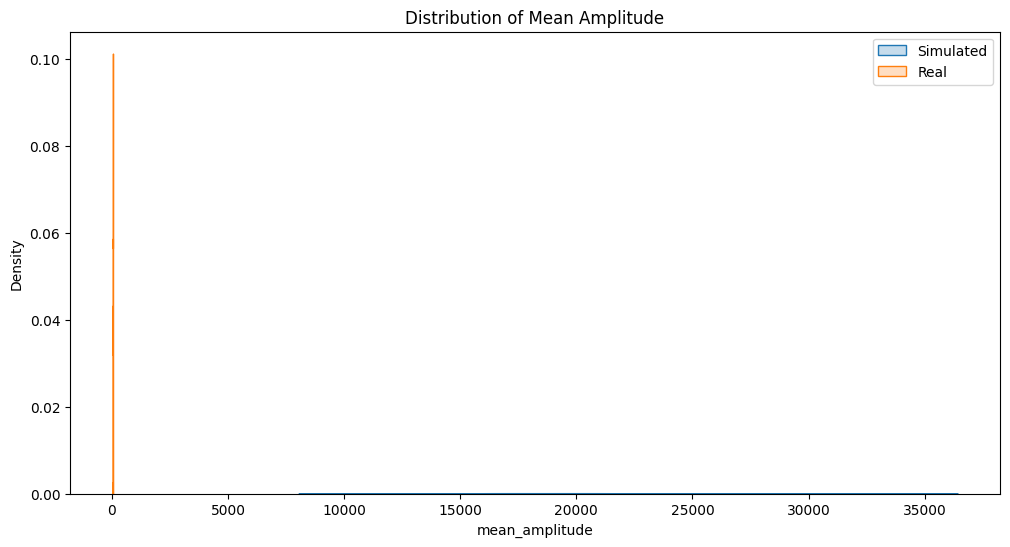

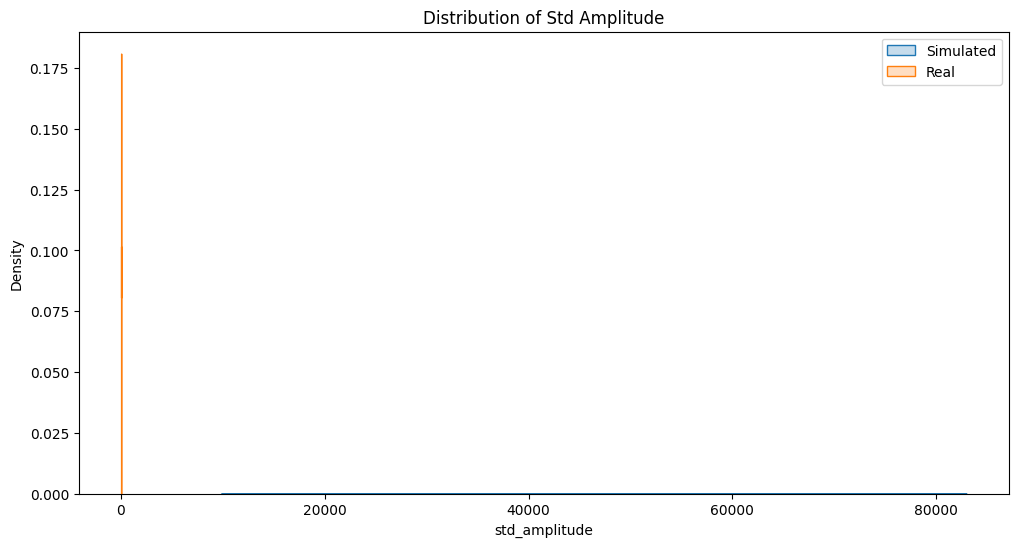

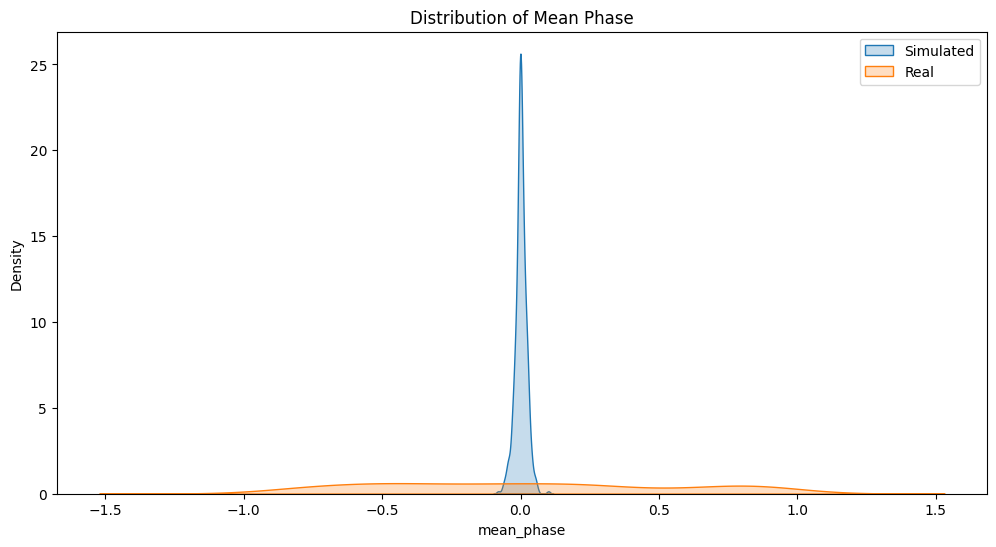

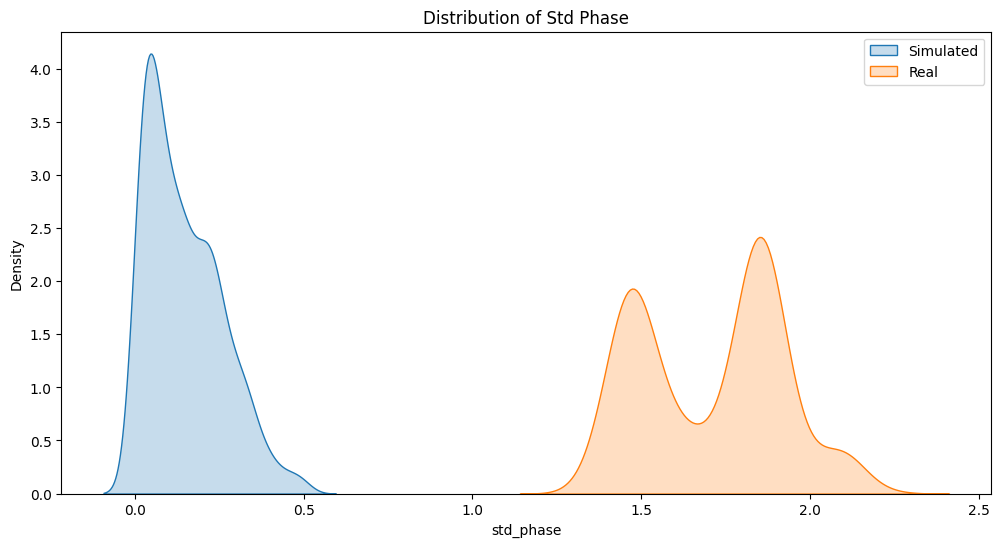

Statistics for mean_amplitude:
Simulated - Mean: 19350.9481, Std: 3659.0760
Real      - Mean: 42.9318, Std: 4.9754
Difference - Mean: 19308.0162, Std: 3654.1006

Statistics for std_amplitude:
Simulated - Mean: 32466.0292, Std: 6631.3087
Real      - Mean: 18.8767, Std: 2.2124
Difference - Mean: 32447.1524, Std: 6629.0963

Statistics for mean_phase:
Simulated - Mean: 0.0005, Std: 0.0203
Real      - Mean: 0.0167, Std: 0.5416
Difference - Mean: 0.0161, Std: 0.5213

Statistics for std_phase:
Simulated - Mean: 0.1460, Std: 0.1116
Real      - Mean: 1.7104, Std: 0.2100
Difference - Mean: 1.5644, Std: 0.0984

Kolmogorov-Smirnov test for mean_amplitude:
KS statistic: 1.0000
p-value: 0.0000
Null hypothesis: Two samples are drawn from the same distribution
Reject the null hypothesis at 5% significance level

Kolmogorov-Smirnov test for std_amplitude:
KS statistic: 1.0000
p-value: 0.0000
Null hypothesis: Two samples are drawn from the same distribution
Reject the null hypothesis at 5% significance 

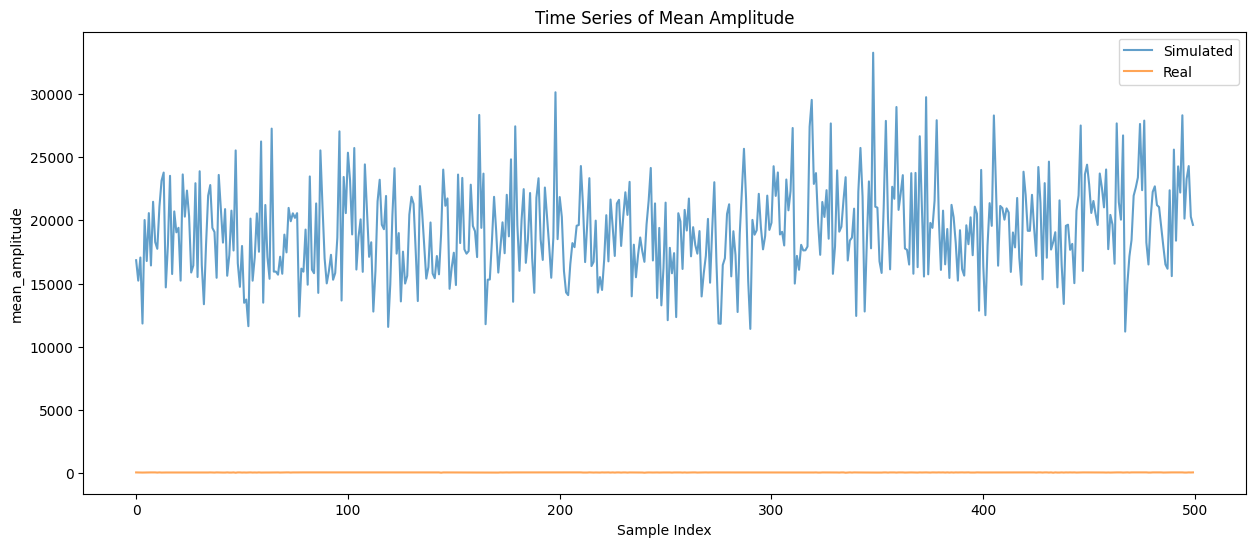

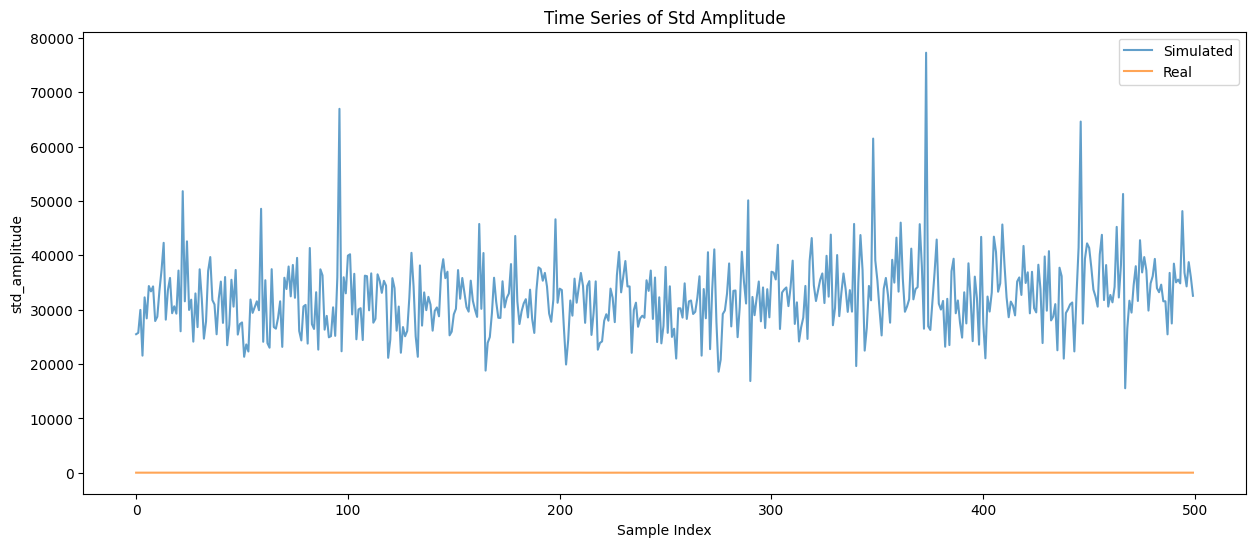

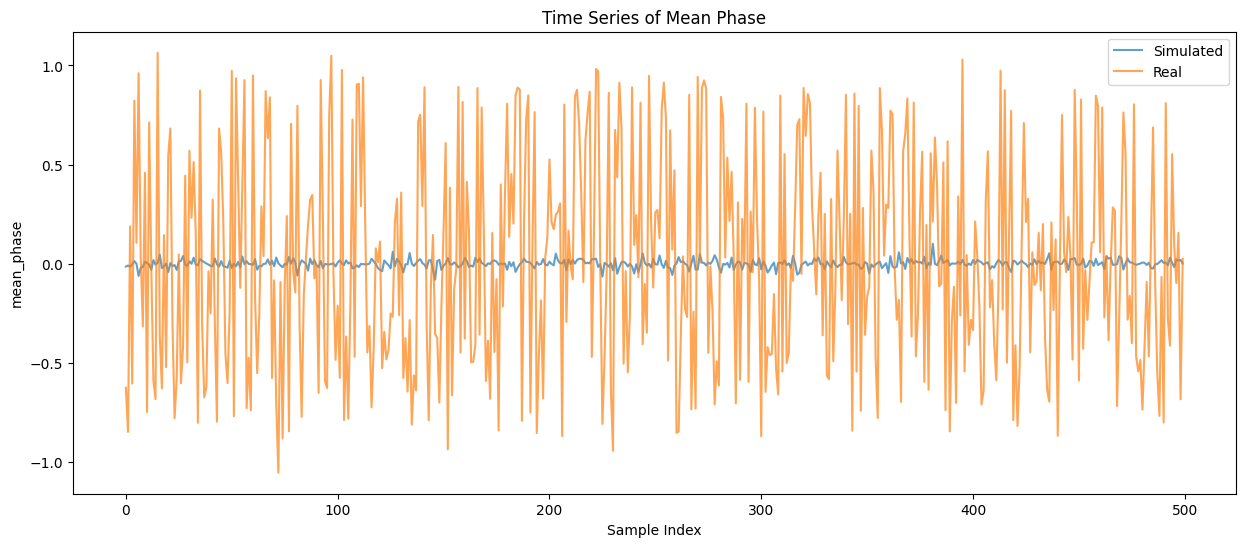

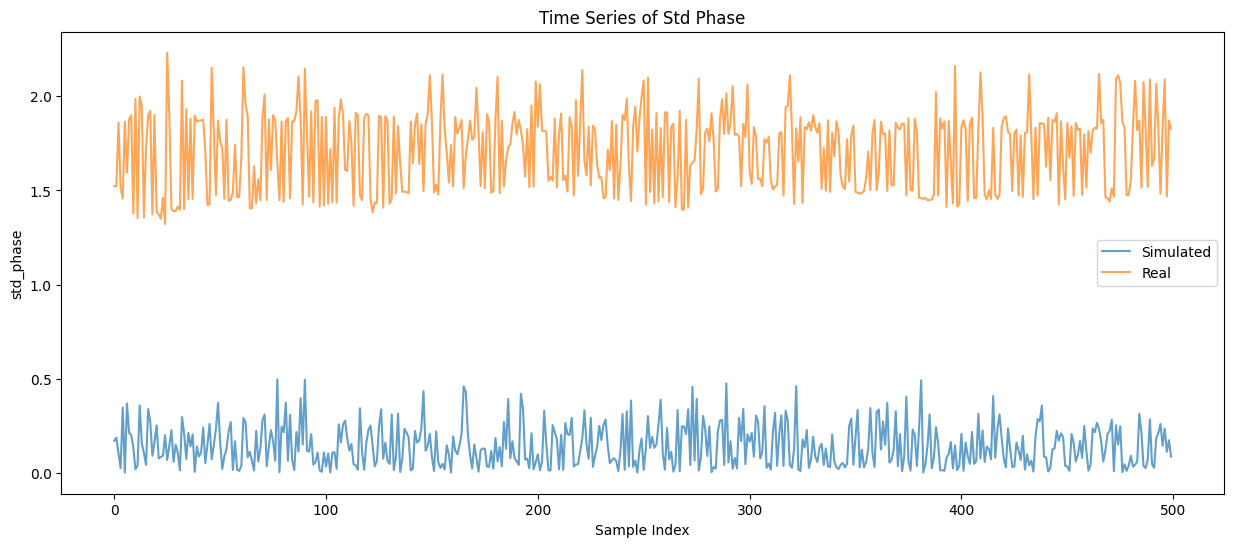

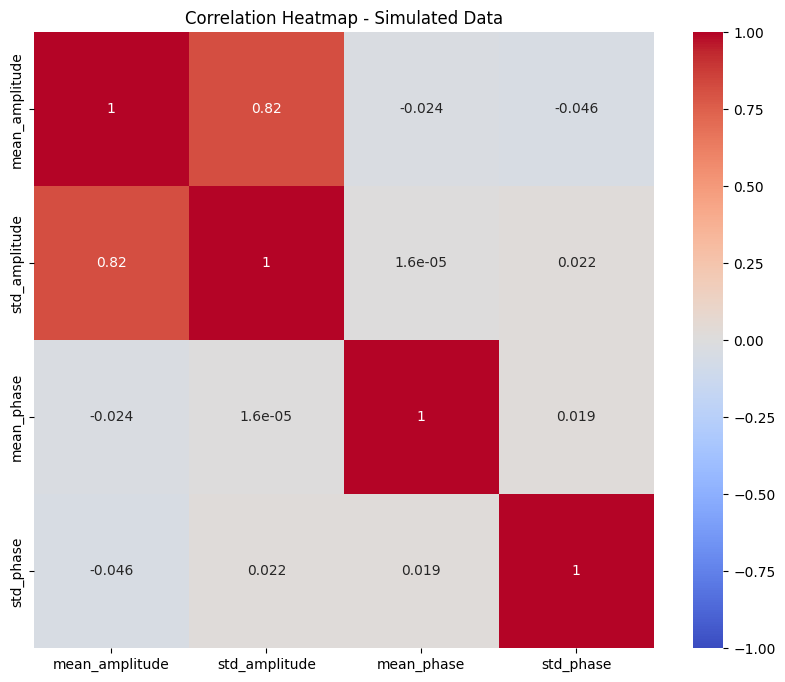

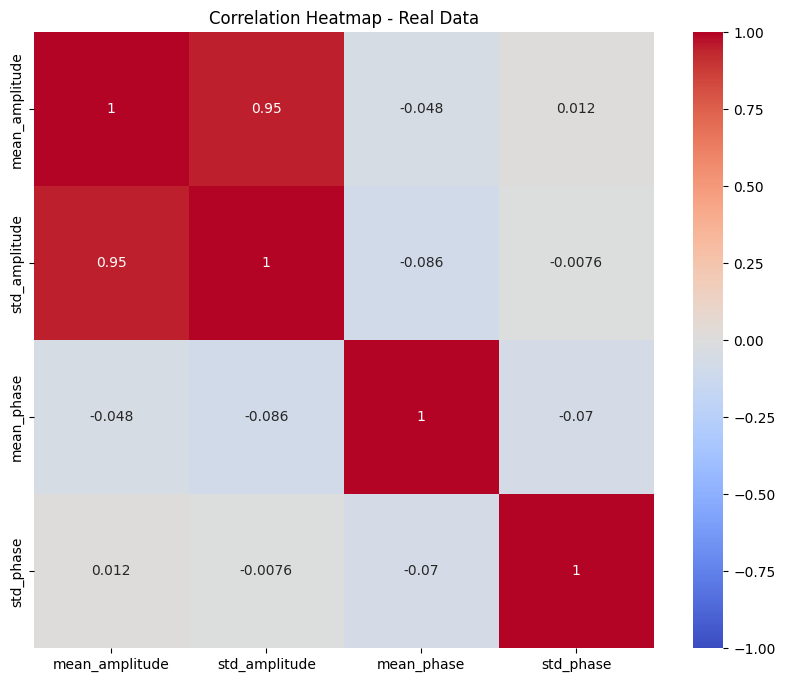

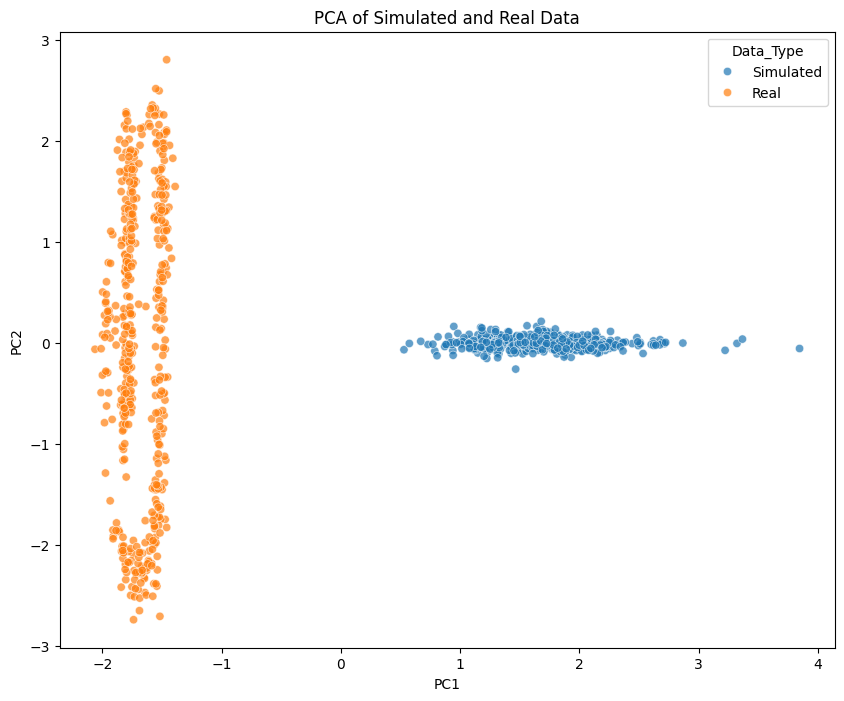

Explained variance ratio:
[0.72856333 0.24992362]
Simulated Data Summary:
       mean_amplitude  std_amplitude  mean_phase   std_phase
count      507.000000     507.000000  507.000000  507.000000
mean     19350.948068   32466.029176    0.000517    0.146041
std       3659.075978    6631.308662    0.020336    0.111610
min      11195.204736   15545.486559   -0.080601    0.003507
25%      16620.507161   28357.224190   -0.009096    0.048671
50%      19219.545388   32008.351424    0.000350    0.122709
75%      21671.067498   35965.115391    0.011651    0.221055
max      33268.249629   77260.167693    0.100763    0.499001

Real Data Summary:
       mean_amplitude  std_amplitude  mean_phase   std_phase
count      500.000000     500.000000  500.000000  500.000000
mean        42.931839      18.876747    0.016652    1.710424
std          4.975389       2.212362    0.541589    0.210033
min         23.018246      11.475148   -1.053987    1.322237
25%         40.113696      17.342502   -0.449714    

In [ ]:
def extract_features(df):
    features = pd.DataFrame()
    features['mean_amplitude'] = df.apply(lambda x: np.abs(x).mean(), axis=1)
    features['std_amplitude'] = df.apply(lambda x: np.abs(x).std(), axis=1)
    features['mean_phase'] = df.apply(lambda x: np.angle(x).mean(), axis=1)
    features['std_phase'] = df.apply(lambda x: np.angle(x).std(), axis=1)
    return features

sim_features = extract_features(simulated_data)
real_features = extract_features(real_data)

def plot_distributions(sim_data, real_data, feature, title):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(sim_data[feature], label='Simulated', fill=True)
    sns.kdeplot(real_data[feature], label='Real', fill=True)
    plt.title(f'Distribution of {title}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot distributions
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    plot_distributions(sim_features, real_features, feature, feature.replace('_', ' ').title())

def compare_statistics(sim_data, real_data, feature):
    sim_mean = sim_data[feature].mean()
    real_mean = real_data[feature].mean()
    sim_std = sim_data[feature].std()
    real_std = real_data[feature].std()

    print(f"Statistics for {feature}:")
    print(f"Simulated - Mean: {sim_mean:.4f}, Std: {sim_std:.4f}")
    print(f"Real      - Mean: {real_mean:.4f}, Std: {real_std:.4f}")
    print(f"Difference - Mean: {abs(sim_mean - real_mean):.4f}, Std: {abs(sim_std - real_std):.4f}")
    print()

# Compare statistics
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    compare_statistics(sim_features, real_features, feature)

def kolmogorov_smirnov_test(sim_data, real_data, feature):
    ks_statistic, p_value = stats.ks_2samp(sim_data[feature], real_data[feature])
    print(f"Kolmogorov-Smirnov test for {feature}:")
    print(f"KS statistic: {ks_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("Null hypothesis: Two samples are drawn from the same distribution")
    print(f"{'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis at 5% significance level")
    print()

# Perform Kolmogorov-Smirnov test
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    kolmogorov_smirnov_test(sim_features, real_features, feature)

def plot_time_series(sim_data, real_data, feature, title):
    plt.figure(figsize=(15, 6))
    plt.plot(sim_data.index[:500], sim_data[feature][:500], label='Simulated', alpha=0.7)
    plt.plot(real_data.index[:500], real_data[feature][:500], label='Real', alpha=0.7)
    plt.title(f'Time Series of {title}')
    plt.xlabel('Sample Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Plot time series
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    plot_time_series(sim_features, real_features, feature, feature.replace('_', ' ').title())

def plot_correlation_heatmap(data, title):
    corr = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap - {title}')
    plt.show()

# Plot correlation heatmaps
plot_correlation_heatmap(sim_features, 'Simulated Data')
plot_correlation_heatmap(real_features, 'Real Data')

def plot_pca(sim_data, real_data):
    # Combine the datasets
    combined_data = pd.concat([sim_data, real_data])

    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_data)

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    # Create a DataFrame with PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df['Data_Type'] = ['Simulated'] * len(sim_data) + ['Real'] * len(real_data)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Data_Type', alpha=0.7)
    plt.title('PCA of Simulated and Real Data')
    plt.show()

    # Print explained variance ratio
    print("Explained variance ratio:")
    print(pca.explained_variance_ratio_)

# Perform PCA
plot_pca(sim_features, real_features)

# Print summary statistics
print("Simulated Data Summary:")
print(sim_features.describe())
print("\nReal Data Summary:")
print(real_features.describe())

Based on the provided results, let's analyze the accuracy of the simulated data compared to the real-time data:

1. Time Series of Std Phase (Image 1):
   - The simulated data (blue) shows much lower variability and magnitude compared to the real data (orange).
   - The real data fluctuates between about 1.5 and 2.2, while the simulated data stays mostly below 0.5.
   - This indicates a significant discrepancy in the phase standard deviation.

2. Correlation Heatmaps (Images 2 and 3):
   - Simulated data shows a strong correlation (0.82) between mean_amplitude and std_amplitude, which is similar to the real data (0.95).
   - However, other correlations differ. For example, the real data shows a slight negative correlation between mean_phase and std_phase (-0.07), which is not present in the simulated data (0.019).

3. PCA of Simulated and Real Data (Image 4):
   - There is a clear separation between simulated and real data points.
   - This indicates that the overall statistical properties of the simulated data are quite different from the real data.

4. Time Series of Mean Phase (Image 5):
   - The simulated data (blue) shows much less variability compared to the real data (orange).
   - The real data fluctuates between about -1 and 1, while the simulated data stays very close to 0.

5. Statistical Summaries:
   - Mean Amplitude: Simulated (19350.95) vs Real (42.93) - Drastically different scales
   - Std Amplitude: Simulated (32466.03) vs Real (18.88) - Again, very different scales
   - Mean Phase: Simulated (0.0005) vs Real (0.0167) - Closer, but still different
   - Std Phase: Simulated (0.146) vs Real (1.710) - Significantly different

6. Explained Variance Ratio:
   - The first two principal components explain about 98% of the variance, indicating that the differences between simulated and real data can be well-captured in two dimensions.

Conclusion:
The current simulation is not very accurate in reproducing the characteristics of the real-time data. The main issues are:

1. Scale: The simulated amplitudes are on a completely different scale compared to the real data.
2. Variability: The simulated data shows much less variability in both amplitude and phase compared to the real data.
3. Phase Characteristics: The phase information in the simulated data doesn't match the patterns seen in the real data.
4. Overall Statistical Properties: As shown by the PCA, the simulated data has fundamentally different statistical properties compared to the real data.

To improve the accuracy:

1. Rescale the simulated amplitudes to match the range of the real data.
2. Increase the variability in both amplitude and phase in the simulation.
3. Adjust the phase generation to better match the distribution and time series characteristics of the real data.
4. Refine the correlation structure between different features to more closely match the real data.
5. Consider incorporating more complex environmental factors or signal processing effects that might be present in the real data but missing from the simulation.

In summary, while the current simulation captures some basic relationships (like the correlation between mean and std amplitude), it needs significant improvements to accurately represent the real-time CSI data for human activity recognition.

---

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

def inspect_csv(file_path):
    try:
        # Read the first few rows of the CSV file as strings
        df = pd.read_csv(file_path, nrows=5, dtype=str)

        print(f"Inspecting file: {file_path}")
        print("Shape:", df.shape)
        print("\nColumn names:")
        print(df.columns.tolist())
        print("\nFirst few rows:")
        print(df.head())

        # Inspect a few specific cells
        print("\nSample values:")
        for col in df.columns[:5]:  # Look at the first 5 columns
            print(f"{col}:")
            print(df[col].iloc[:3].tolist())  # Print first 3 values of each column

        print("\n" + "="*50 + "\n")
    except Exception as e:
        print(f"An error occurred while inspecting {file_path}: {e}")

# Set the path to your data
data_path = '/content/drive/MyDrive/Colab Notebooks/Database/'

# Inspect both datasets
inspect_csv(data_path + 'simulated_kneel_fix4_data.csv')
inspect_csv(data_path + 'kneel_1_subset.csv')

# Additional error checking
import os

print("Checking file existence and permissions:")
for file_name in ['simulated_kneel_fix4_data.csv', 'kneel_1_subset.csv']:
    full_path = os.path.join(data_path, file_name)
    if os.path.exists(full_path):
        print(f"{file_name} exists.")
        if os.access(full_path, os.R_OK):
            print(f"{file_name} is readable.")
        else:
            print(f"{file_name} is not readable.")
    else:
        print(f"{file_name} does not exist.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Inspecting file: /content/drive/MyDrive/Colab Notebooks/Database/simulated_kneel_fix4_data.csv
Shape: (5, 90)

Column names:
['tx1rx1_sub1', 'tx1rx1_sub2', 'tx1rx1_sub3', 'tx1rx1_sub4', 'tx1rx1_sub5', 'tx1rx1_sub6', 'tx1rx1_sub7', 'tx1rx1_sub8', 'tx1rx1_sub9', 'tx1rx1_sub10', 'tx1rx1_sub11', 'tx1rx1_sub12', 'tx1rx1_sub13', 'tx1rx1_sub14', 'tx1rx1_sub15', 'tx1rx1_sub16', 'tx1rx1_sub17', 'tx1rx1_sub18', 'tx1rx1_sub19', 'tx1rx1_sub20', 'tx1rx1_sub21', 'tx1rx1_sub22', 'tx1rx1_sub23', 'tx1rx1_sub24', 'tx1rx1_sub25', 'tx1rx1_sub26', 'tx1rx1_sub27', 'tx1rx1_sub28', 'tx1rx2_sub1', 'tx1rx2_sub2', 'tx1rx2_sub3', 'tx1rx2_sub4', 'tx1rx2_sub5', 'tx1rx2_sub6', 'tx1rx2_sub7', 'tx1rx2_sub8', 'tx1rx2_sub9', 'tx1rx2_sub10', 'tx1rx2_sub11', 'tx1rx2_sub12', 'tx1rx2_sub13', 'tx1rx2_sub14', 'tx1rx2_sub15', 'tx1rx2_sub16', 'tx1rx2_sub17', 'tx1rx2_sub18', 'tx1rx2_sub19', 'tx1rx2_sub

In [ ]:
def parse_complex_simulated(x):
    try:
        return complex(x.replace('+-', '-'))
    except ValueError:
        print(f"Could not parse simulated value: {x}")
        return np.nan

def parse_complex_real(x):
    if isinstance(x, str):
        # Remove any spaces and replace 'i' with 'j'
        x = x.replace(' ', '').replace('i', 'j')
        try:
            return complex(x)
        except ValueError:
            # If it's in the format "a+bj", add the missing parentheses
            try:
                return complex(x.replace('j', 'j)').replace('+', '+(', 1).replace('-', '-(', 1))
            except ValueError:
                print(f"Could not parse real value: {x}")
                return np.nan
    else:
        return complex(x)

def load_complex_data(file_path, is_simulated=True):
    df = pd.read_csv(file_path)
    parse_func = parse_complex_simulated if is_simulated else parse_complex_real
    for col in df.columns:
        df[col] = df[col].apply(parse_func)
    return df

# Set the path to your data
data_path = '/content/drive/MyDrive/Colab Notebooks/Database/'

# Load the datasets
try:
    simulated_data = load_complex_data(data_path + 'simulated_kneel_fix4_data.csv', is_simulated=True)
    real_data = load_complex_data(data_path + 'kneel_1_subset.csv', is_simulated=False)

    print("Simulated data shape:", simulated_data.shape)
    print("Real data shape:", real_data.shape)

    print("\nFirst few rows of simulated data:")
    print(simulated_data.head())

    print("\nFirst few rows of real data:")
    print(real_data.head())

except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    print("Please check the file paths and data formats.")

# Check for any NaN values
print("\nNaN values in simulated data:")
print(simulated_data.isna().sum().sum())

print("\nNaN values in real data:")
print(real_data.isna().sum().sum())

# If there are NaN values, print the rows containing them
if simulated_data.isna().sum().sum() > 0:
    print("\nRows with NaN values in simulated data:")
    print(simulated_data[simulated_data.isna().any(axis=1)])

if real_data.isna().sum().sum() > 0:
    print("\nRows with NaN values in real data:")
    print(real_data[real_data.isna().any(axis=1)])

Simulated data shape: (532, 90)
Real data shape: (500, 90)

First few rows of simulated data:
            tx1rx1_sub1           tx1rx1_sub2           tx1rx1_sub3  \
0  10.000000- 2.724988j  10.000000- 2.544743j  10.000000- 0.542906j   
1  10.000000- 2.824709j  10.000000+ 1.115371j  10.000000- 0.304448j   
2  10.000000+ 2.573100j  10.000000- 2.529380j  10.000000- 0.792047j   
3  10.000000+ 0.237336j  10.000000- 1.145663j  10.000000- 1.346805j   
4  10.000000+ 2.685961j  10.000000+ 1.980932j  10.000000- 0.044953j   

            tx1rx1_sub4           tx1rx1_sub5           tx1rx1_sub6  \
0  10.000000+ 2.333379j  10.000000+ 0.839504j  10.000000- 0.314163j   
1  10.000000+ 2.223461j  10.000000- 0.309533j  10.000000+ 1.903299j   
2  10.000000- 3.970691j  10.000000- 1.459454j  10.000000+ 1.210303j   
3  10.000000- 1.586263j  10.000000- 0.436035j  10.000000- 0.859305j   
4  10.000000- 0.117459j  10.000000+ 2.589437j  10.000000- 0.258630j   

            tx1rx1_sub7           tx1rx1_sub8       

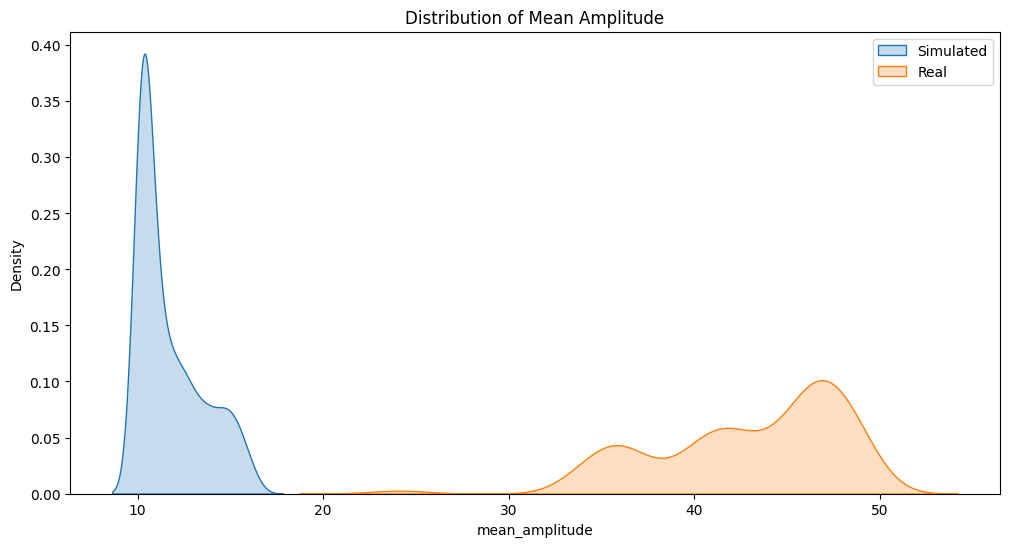

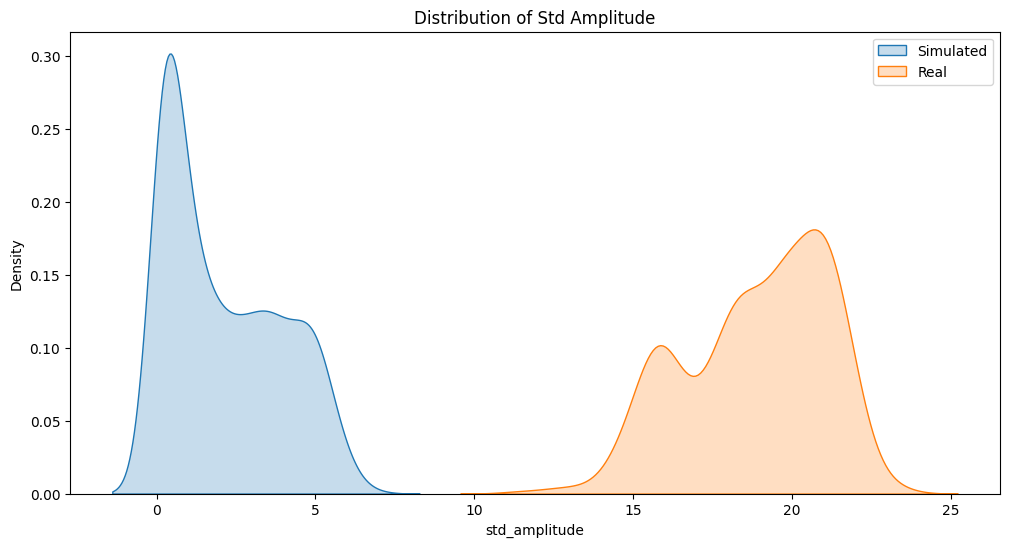

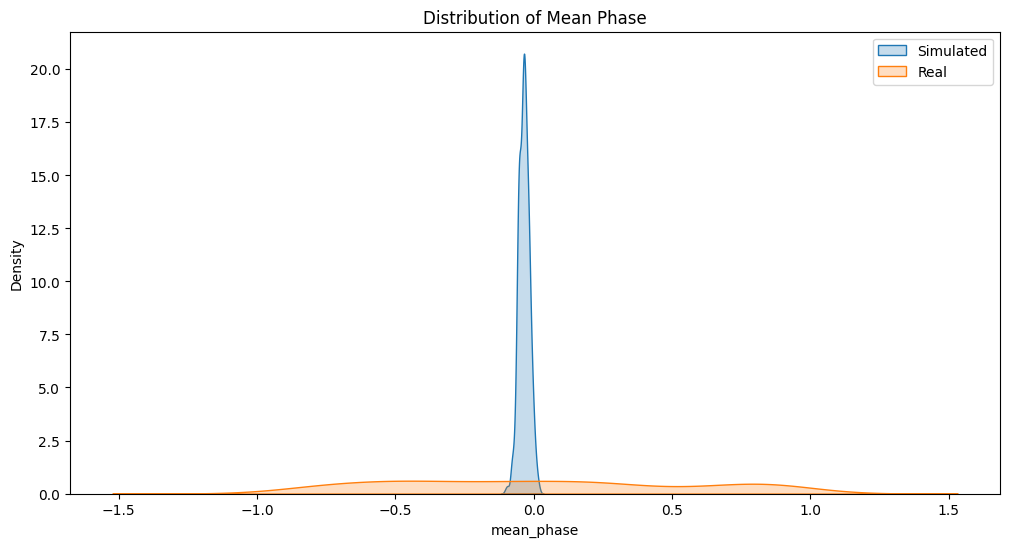

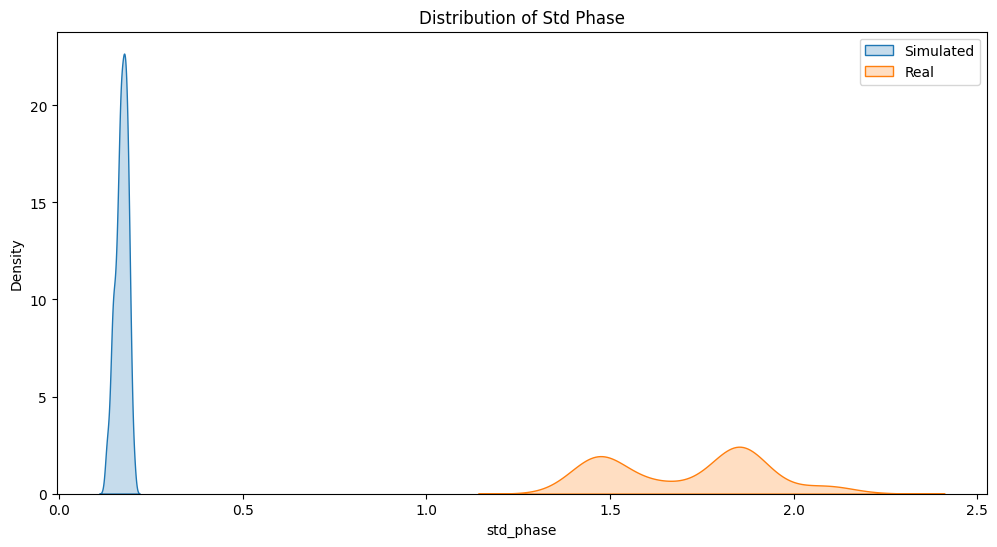

Statistics for mean_amplitude:
Simulated - Mean: 11.7079, Std: 1.7443
Real      - Mean: 42.9318, Std: 4.9754
Difference - Mean: 31.2240, Std: 3.2311

Statistics for std_amplitude:
Simulated - Mean: 2.1089, Std: 1.7940
Real      - Mean: 18.8767, Std: 2.2124
Difference - Mean: 16.7678, Std: 0.4183

Statistics for mean_phase:
Simulated - Mean: -0.0354, Std: 0.0190
Real      - Mean: 0.0167, Std: 0.5416
Difference - Mean: 0.0521, Std: 0.5226

Statistics for std_phase:
Simulated - Mean: 0.1693, Std: 0.0168
Real      - Mean: 1.7104, Std: 0.2100
Difference - Mean: 1.5411, Std: 0.1933

Kolmogorov-Smirnov test for mean_amplitude:
KS statistic: 1.0000
p-value: 0.0000
Null hypothesis: Two samples are drawn from the same distribution
Reject the null hypothesis at 5% significance level

Kolmogorov-Smirnov test for std_amplitude:
KS statistic: 1.0000
p-value: 0.0000
Null hypothesis: Two samples are drawn from the same distribution
Reject the null hypothesis at 5% significance level

Kolmogorov-Smirno

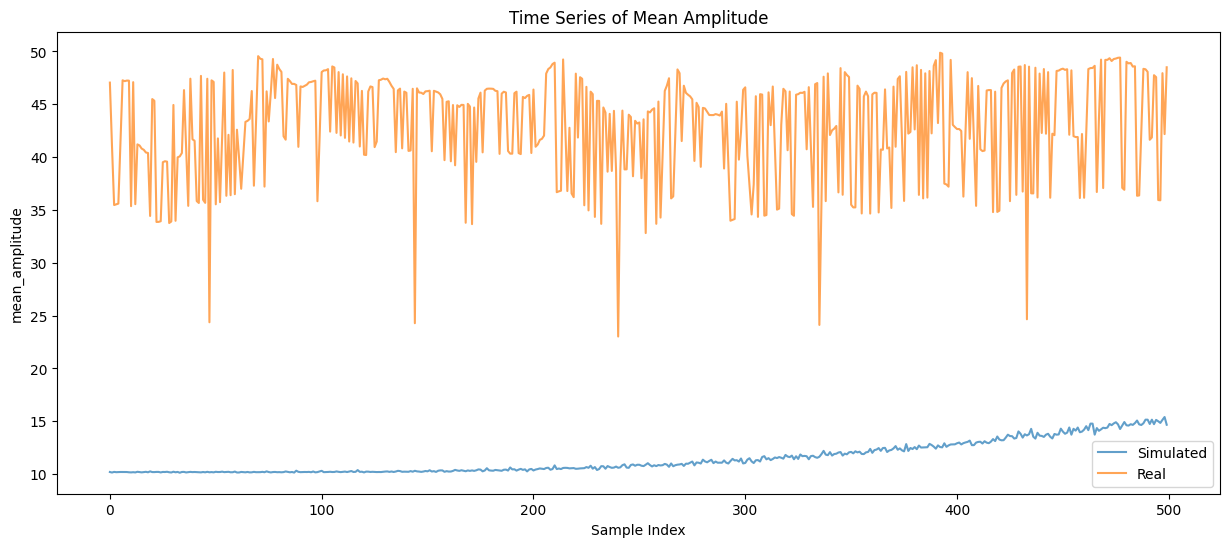

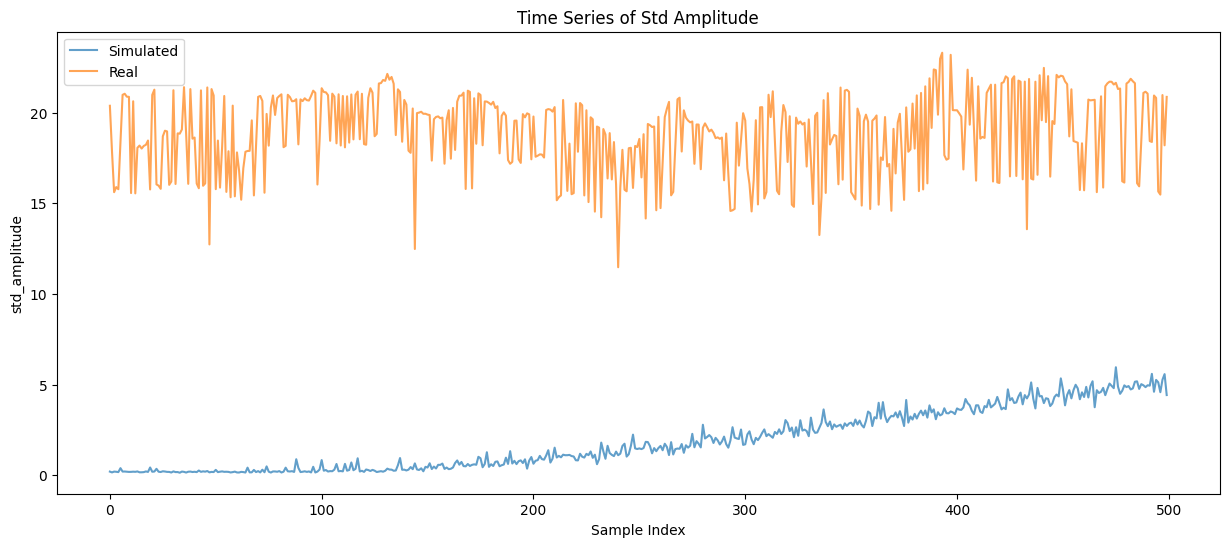

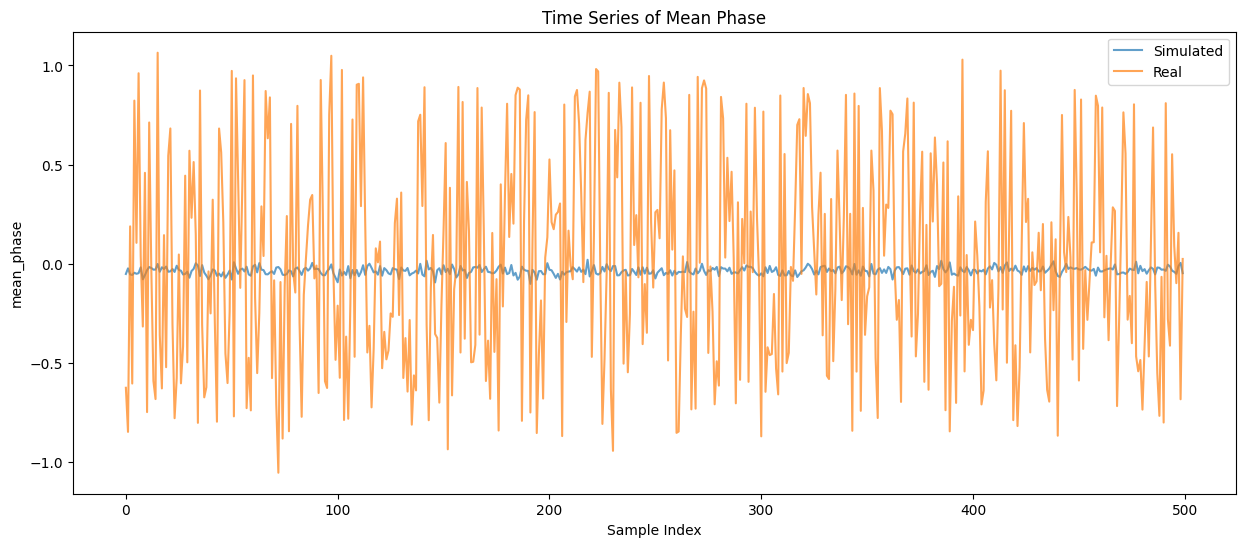

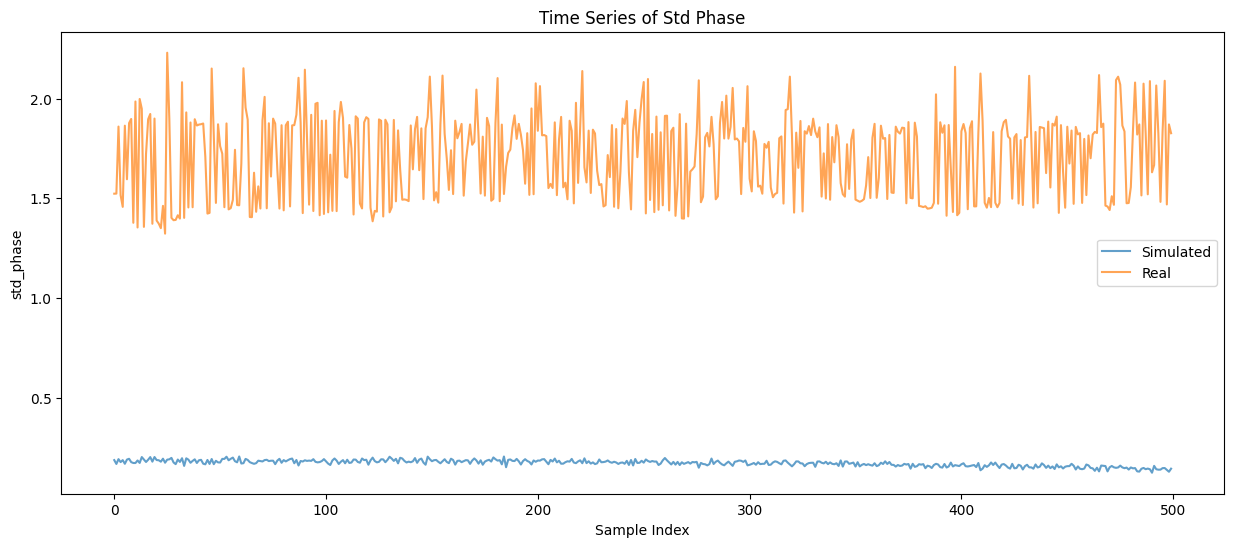

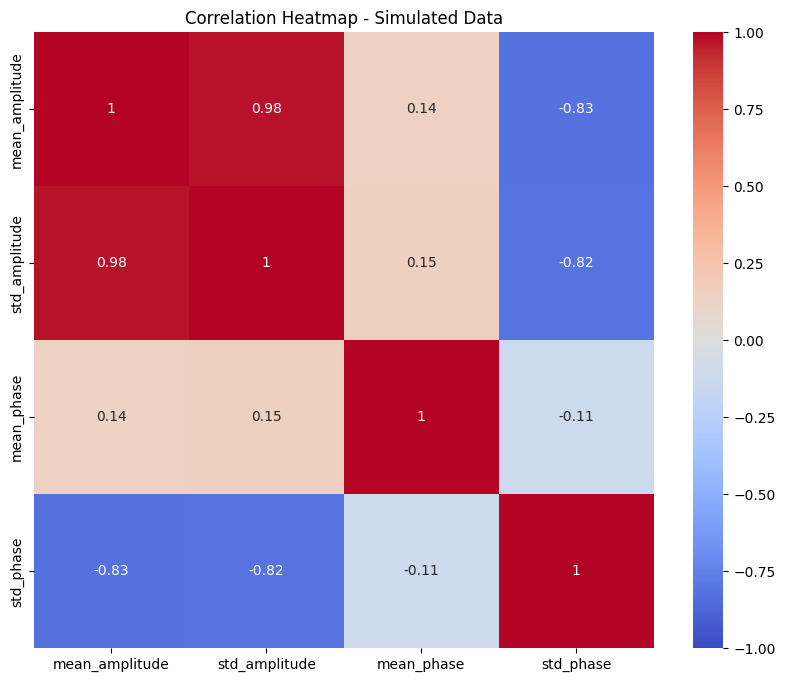

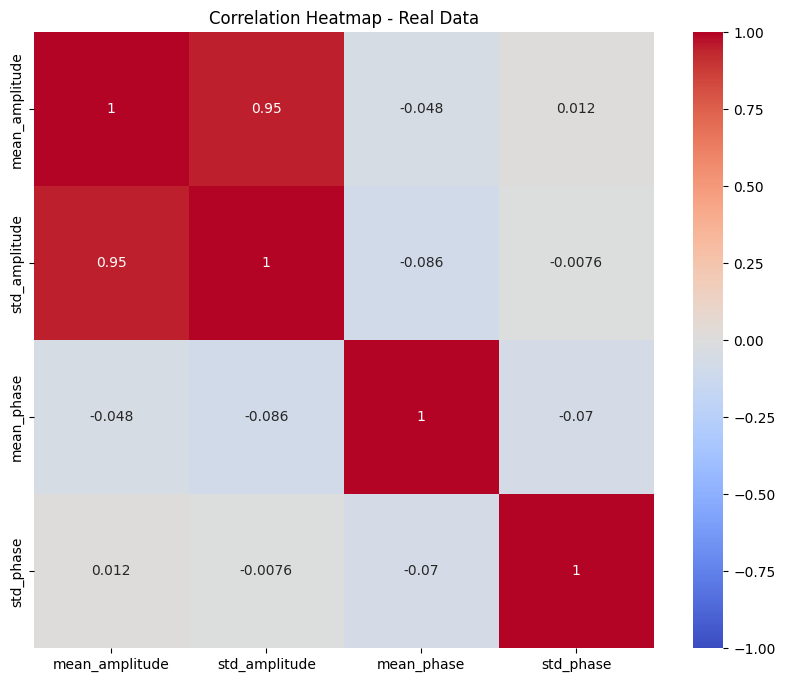

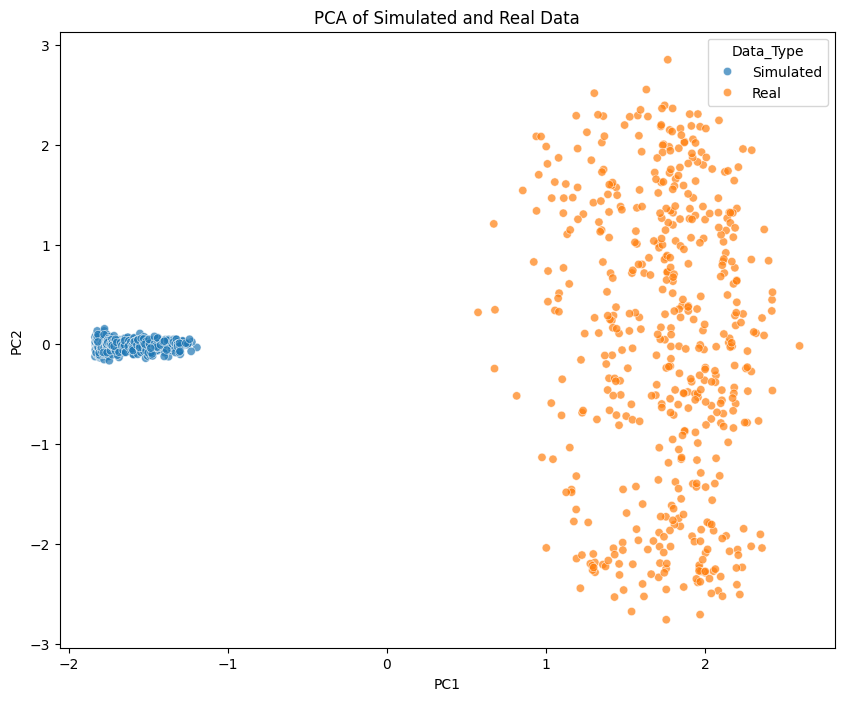

Explained variance ratio:
[0.73509906 0.24884287]
Simulated Data Summary:
       mean_amplitude  std_amplitude  mean_phase   std_phase
count      532.000000     532.000000  532.000000  532.000000
mean        11.707867       2.108940   -0.035443    0.169274
std          1.744317       1.794031    0.019009    0.016782
min         10.126070       0.138811   -0.101540    0.122769
25%         10.237701       0.356549   -0.049456    0.158347
50%         10.900789       1.615710   -0.035466    0.171153
75%         12.807715       3.624029   -0.022647    0.182114
max         16.364041       6.747879    0.019838    0.204275

Real Data Summary:
       mean_amplitude  std_amplitude  mean_phase   std_phase
count      500.000000     500.000000  500.000000  500.000000
mean        42.931839      18.876747    0.016652    1.710424
std          4.975389       2.212362    0.541589    0.210033
min         23.018246      11.475148   -1.053987    1.322237
25%         40.113696      17.342502   -0.449714    

In [ ]:
def extract_features(df):
    features = pd.DataFrame()
    features['mean_amplitude'] = df.apply(lambda x: np.abs(x).mean(), axis=1)
    features['std_amplitude'] = df.apply(lambda x: np.abs(x).std(), axis=1)
    features['mean_phase'] = df.apply(lambda x: np.angle(x).mean(), axis=1)
    features['std_phase'] = df.apply(lambda x: np.angle(x).std(), axis=1)
    return features

sim_features = extract_features(simulated_data)
real_features = extract_features(real_data)

def plot_distributions(sim_data, real_data, feature, title):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(sim_data[feature], label='Simulated', fill=True)
    sns.kdeplot(real_data[feature], label='Real', fill=True)
    plt.title(f'Distribution of {title}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot distributions
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    plot_distributions(sim_features, real_features, feature, feature.replace('_', ' ').title())

def compare_statistics(sim_data, real_data, feature):
    sim_mean = sim_data[feature].mean()
    real_mean = real_data[feature].mean()
    sim_std = sim_data[feature].std()
    real_std = real_data[feature].std()

    print(f"Statistics for {feature}:")
    print(f"Simulated - Mean: {sim_mean:.4f}, Std: {sim_std:.4f}")
    print(f"Real      - Mean: {real_mean:.4f}, Std: {real_std:.4f}")
    print(f"Difference - Mean: {abs(sim_mean - real_mean):.4f}, Std: {abs(sim_std - real_std):.4f}")
    print()

# Compare statistics
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    compare_statistics(sim_features, real_features, feature)

def kolmogorov_smirnov_test(sim_data, real_data, feature):
    ks_statistic, p_value = stats.ks_2samp(sim_data[feature], real_data[feature])
    print(f"Kolmogorov-Smirnov test for {feature}:")
    print(f"KS statistic: {ks_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("Null hypothesis: Two samples are drawn from the same distribution")
    print(f"{'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis at 5% significance level")
    print()

# Perform Kolmogorov-Smirnov test
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    kolmogorov_smirnov_test(sim_features, real_features, feature)

def plot_time_series(sim_data, real_data, feature, title):
    plt.figure(figsize=(15, 6))
    plt.plot(sim_data.index[:500], sim_data[feature][:500], label='Simulated', alpha=0.7)
    plt.plot(real_data.index[:500], real_data[feature][:500], label='Real', alpha=0.7)
    plt.title(f'Time Series of {title}')
    plt.xlabel('Sample Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Plot time series
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    plot_time_series(sim_features, real_features, feature, feature.replace('_', ' ').title())

def plot_correlation_heatmap(data, title):
    corr = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap - {title}')
    plt.show()

# Plot correlation heatmaps
plot_correlation_heatmap(sim_features, 'Simulated Data')
plot_correlation_heatmap(real_features, 'Real Data')

def plot_pca(sim_data, real_data):
    # Combine the datasets
    combined_data = pd.concat([sim_data, real_data])

    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_data)

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    # Create a DataFrame with PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df['Data_Type'] = ['Simulated'] * len(sim_data) + ['Real'] * len(real_data)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Data_Type', alpha=0.7)
    plt.title('PCA of Simulated and Real Data')
    plt.show()

    # Print explained variance ratio
    print("Explained variance ratio:")
    print(pca.explained_variance_ratio_)

# Perform PCA
plot_pca(sim_features, real_features)

# Print summary statistics
print("Simulated Data Summary:")
print(sim_features.describe())
print("\nReal Data Summary:")
print(real_features.describe())

Based on the results and images, let's analyze the accuracy of the simulated data compared to the real-time data:

1. PCA Analysis:
   - There is a clear separation between simulated and real data points.
   - This indicates that the overall statistical properties of the simulated data are still quite different from the real data.

2. Correlation Heatmaps:
   - Real Data: Shows strong correlation (0.95) between mean_amplitude and std_amplitude.
   - Simulated Data: Also shows strong correlation (0.98) between mean_amplitude and std_amplitude, which is similar to real data.
   - However, other correlations differ significantly. For example, the simulated data shows strong negative correlations (-0.83, -0.82) between std_phase and amplitude features, which are not present in the real data.

3. Time Series of Std Amplitude:
   - The simulated data (blue) shows much lower values and less variability compared to the real data (orange).
   - The real data fluctuates between about 15 and 23, while the simulated data stays mostly below 5.
   - There's an increasing trend in the simulated data that's not present in the real data.

4. Statistical Comparisons:
   - Mean Amplitude: Simulated (11.7079) vs Real (42.9318) - Still significantly different
   - Std Amplitude: Simulated (2.1089) vs Real (18.8767) - Large discrepancy
   - Mean Phase: Simulated (-0.0354) vs Real (0.0167) - Closer, but still different
   - Std Phase: Simulated (0.1693) vs Real (1.7104) - Significant difference

5. Kolmogorov-Smirnov Tests:
   - All tests reject the null hypothesis, indicating that the distributions of all features in the simulated data are significantly different from the real data.

6. Explained Variance Ratio:
   - The first two principal components explain about 98% of the variance, indicating that the differences between simulated and real data can be well-captured in two dimensions.

Conclusion:
While some improvements have been made, the current simulation is still not accurately reproducing the characteristics of the real-time data. The main issues are:

1. Scale: The simulated amplitudes are still on a different scale compared to the real data.
2. Variability: The simulated data shows much less variability in both amplitude and phase compared to the real data.
3. Correlation Structure: The relationships between features in the simulated data do not match those in the real data, especially for phase-related features.
4. Distribution: The distributions of all features are significantly different between simulated and real data.

To improve the accuracy:

1. Adjust the amplitude scaling to match the range of the real data (approximately 23-50 for mean amplitude).
2. Increase the variability in both amplitude and phase in the simulation, particularly for the standard deviation of amplitude.
3. Refine the phase generation to better match the distribution and time series characteristics of the real data.
4. Adjust the correlation structure between different features to more closely match the real data, especially the relationships involving phase.
5. Investigate and implement any periodic patterns or trends observed in the real data that are not currently captured in the simulation.
6. Consider incorporating more complex environmental factors or signal processing effects that might be present in the real data but missing from the simulation.

In summary, while the simulation has captured some basic relationships (like the correlation between mean and std amplitude), it needs significant improvements to accurately represent the real-time CSI data for human activity recognition. The focus should be on scaling, variability, and more accurate modeling of the relationships between amplitude and phase characteristics.

---

In [ ]:
def parse_complex(x):
    if isinstance(x, (int, float)):
        return complex(x)
    elif isinstance(x, str):
        # Remove any spaces
        x = x.replace(' ', '')
        try:
            # Try parsing as a complex number directly
            return complex(x.replace('i', 'j'))
        except ValueError:
            # If that fails, try splitting real and imaginary parts
            if '+' in x or '-' in x[1:]:
                parts = x.replace('i', 'j').replace('+-', '-').split('+')
                if len(parts) == 1:
                    parts = x.split('-')
                    if len(parts) > 2:
                        return complex(parts[0] + '-' + parts[1] + '-' + parts[2].replace('i', 'j'))
                    else:
                        return complex('-' + parts[1].replace('i', 'j'))
                elif len(parts) == 2:
                    return complex(parts[0] + '+' + parts[1])
            print(f"Could not parse: {x}")
            return np.nan
    return np.nan

def load_complex_data(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].apply(parse_complex)
    return df

# Set the path to your data
data_path = '/content/drive/MyDrive/Colab Notebooks/Database/'

# Load the datasets
try:
    simulated_data = load_complex_data(data_path + 'simulated_kneel_fix5_data.csv')
    real_data = load_complex_data(data_path + 'kneel_1_subset.csv')

    print("Simulated data shape:", simulated_data.shape)
    print("Real data shape:", real_data.shape)

    print("\nFirst few rows of simulated data:")
    print(simulated_data.head())

    print("\nFirst few rows of real data:")
    print(real_data.head())

except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    print("Please check the file paths and data formats.")

# Check for any NaN values
print("\nNaN values in simulated data:")
print(simulated_data.isna().sum().sum())

print("\nNaN values in real data:")
print(real_data.isna().sum().sum())

# If there are NaN values, print the rows containing them
if simulated_data.isna().sum().sum() > 0:
    print("\nRows with NaN values in simulated data:")
    print(simulated_data[simulated_data.isna().any(axis=1)])

if real_data.isna().sum().sum() > 0:
    print("\nRows with NaN values in real data:")
    print(real_data[real_data.isna().any(axis=1)])

Simulated data shape: (542, 90)
Real data shape: (500, 90)

First few rows of simulated data:
            tx1rx1_sub1           tx1rx1_sub2           tx1rx1_sub3  \
0  31.474745+ 1.188931j  10.170128+ 0.636100j   0.000000- 0.095433j   
1  41.758436+ 0.490901j   0.000000- 2.305629j   0.000000- 1.196918j   
2   0.000000- 2.386539j  45.617317+ 0.718406j  29.165172+ 3.013423j   
3   0.000000- 2.688291j   0.000000- 0.191414j   0.000000- 3.133382j   
4  14.976843+ 2.733598j   0.000000- 0.472196j   0.000000- 2.365460j   

            tx1rx1_sub4           tx1rx1_sub5           tx1rx1_sub6  \
0  50.000000+ 0.126307j   0.000000- 3.457856j  15.633053+ 0.839709j   
1  17.713468+ 1.345011j  45.037394+ 3.075770j   0.000000- 1.795766j   
2   0.000000- 3.012504j   0.000000- 3.862670j  16.252721+ 1.962939j   
3   0.000000- 3.236761j  10.000000+ 2.271239j  22.304791+ 0.406094j   
4  21.353038+ 2.183133j   0.000000- 0.436355j   0.000000- 2.313533j   

            tx1rx1_sub7           tx1rx1_sub8       

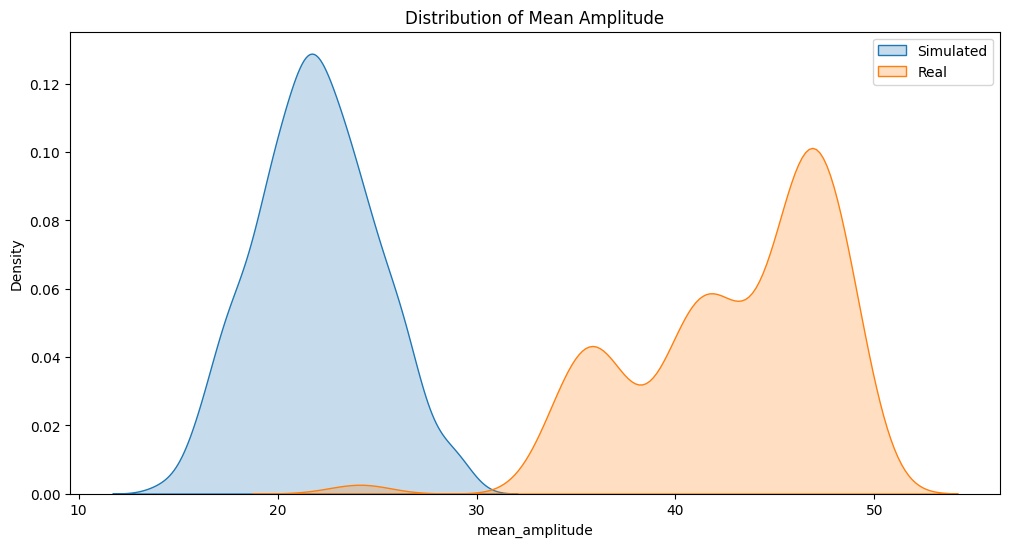

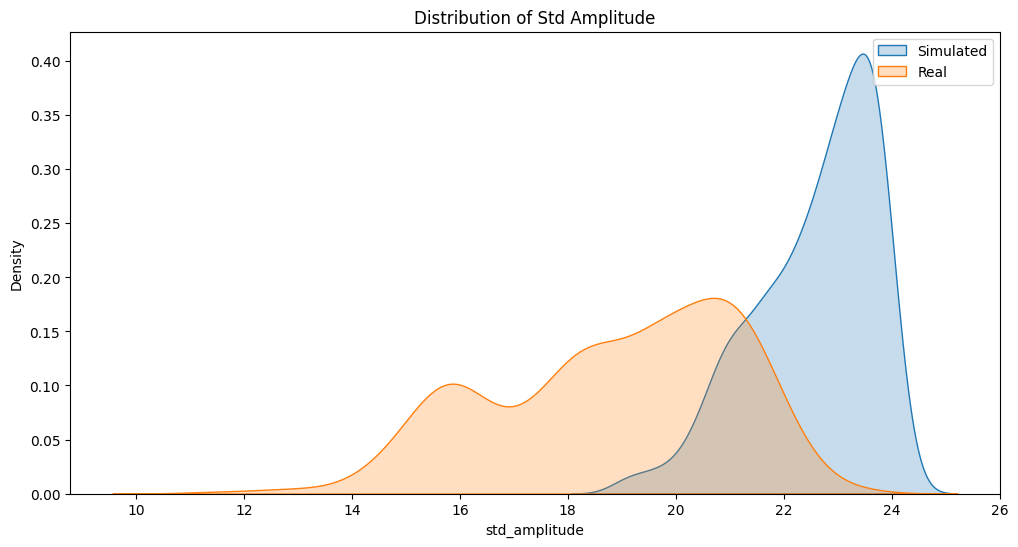

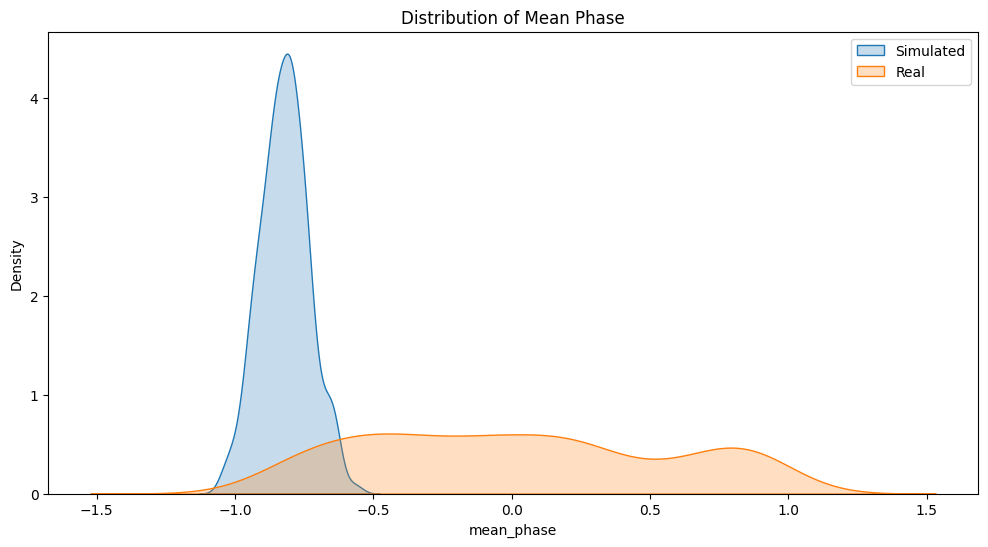

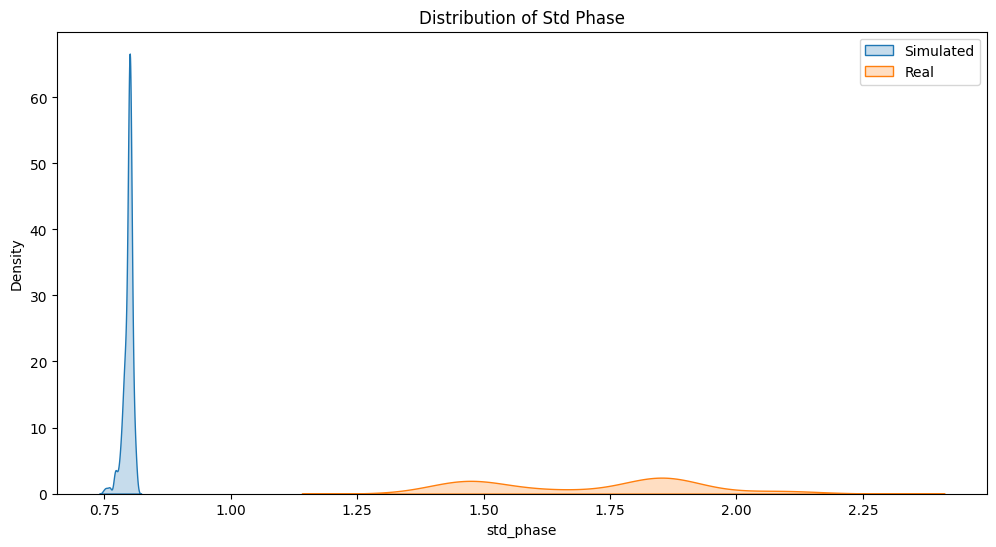

Statistics for mean_amplitude:
Simulated - Mean: 21.9314, Std: 2.9890
Real      - Mean: 42.9318, Std: 4.9754
Difference - Mean: 21.0004, Std: 1.9864

Statistics for std_amplitude:
Simulated - Mean: 22.5754, Std: 1.1219
Real      - Mean: 18.8767, Std: 2.2124
Difference - Mean: 3.6987, Std: 1.0904

Statistics for mean_phase:
Simulated - Mean: -0.8219, Std: 0.0884
Real      - Mean: 0.0167, Std: 0.5416
Difference - Mean: 0.8386, Std: 0.4532

Statistics for std_phase:
Simulated - Mean: 0.7969, Std: 0.0095
Real      - Mean: 1.7104, Std: 0.2100
Difference - Mean: 0.9135, Std: 0.2006

Kolmogorov-Smirnov test for mean_amplitude:
KS statistic: 0.9900
p-value: 0.0000
Null hypothesis: Two samples are drawn from the same distribution
Reject the null hypothesis at 5% significance level

Kolmogorov-Smirnov test for std_amplitude:
KS statistic: 0.7259
p-value: 0.0000
Null hypothesis: Two samples are drawn from the same distribution
Reject the null hypothesis at 5% significance level

Kolmogorov-Smirno

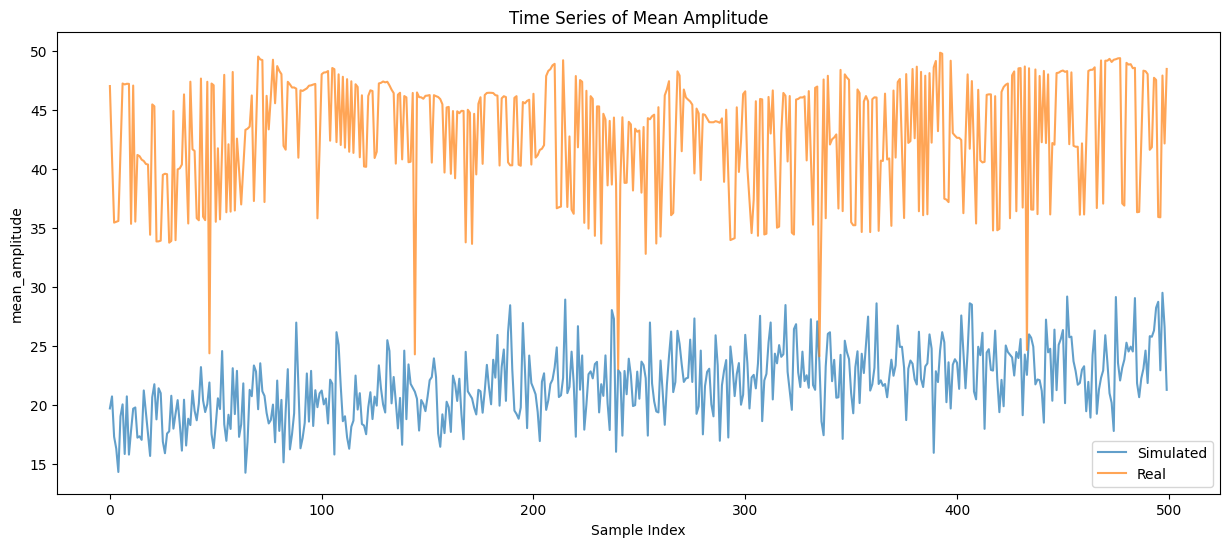

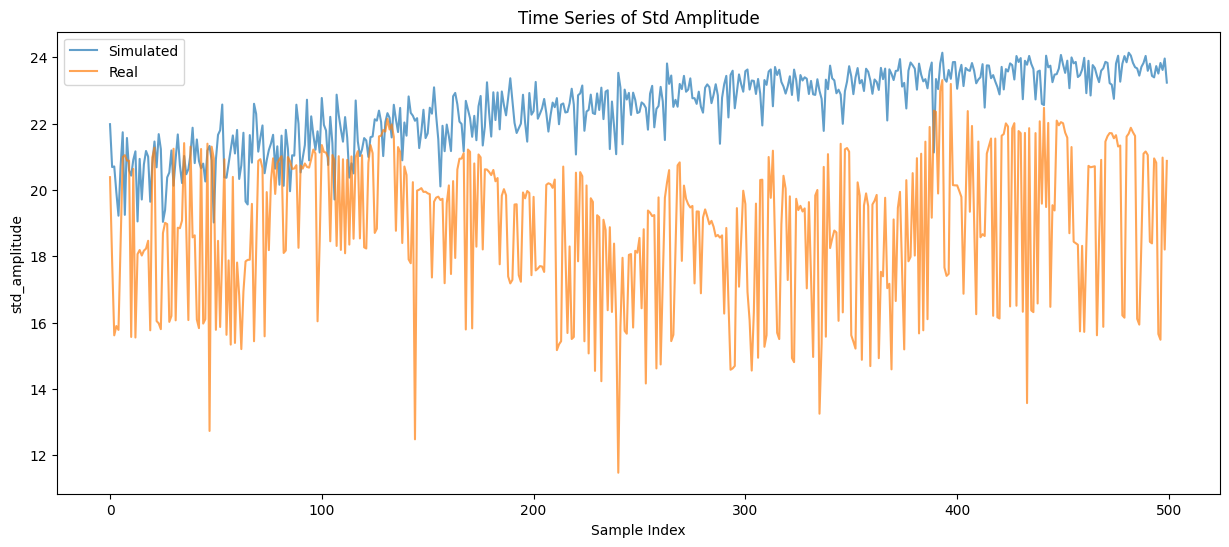

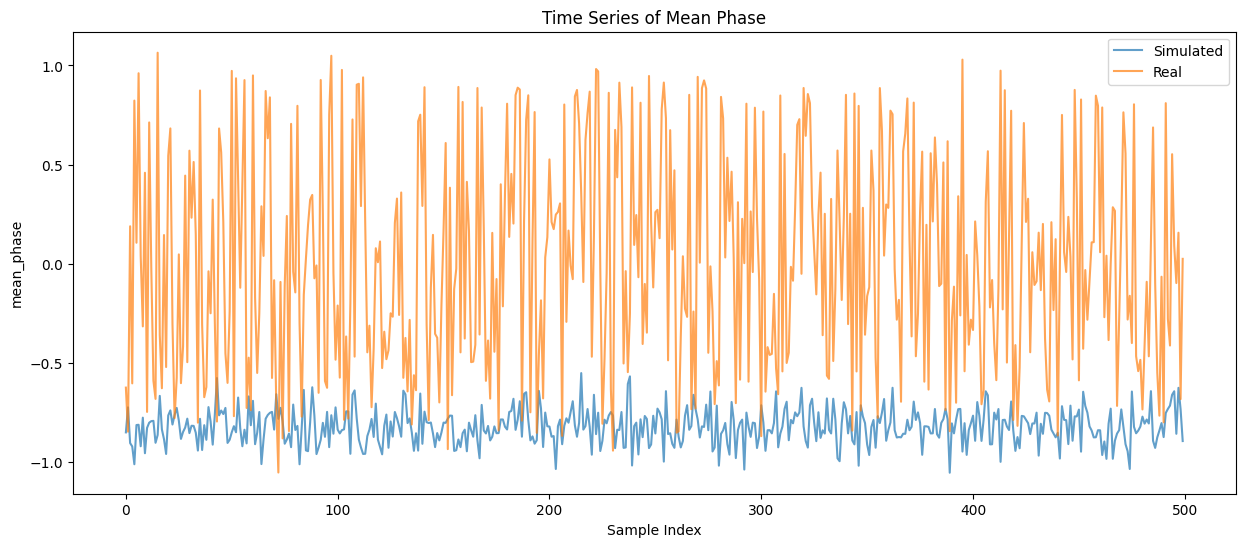

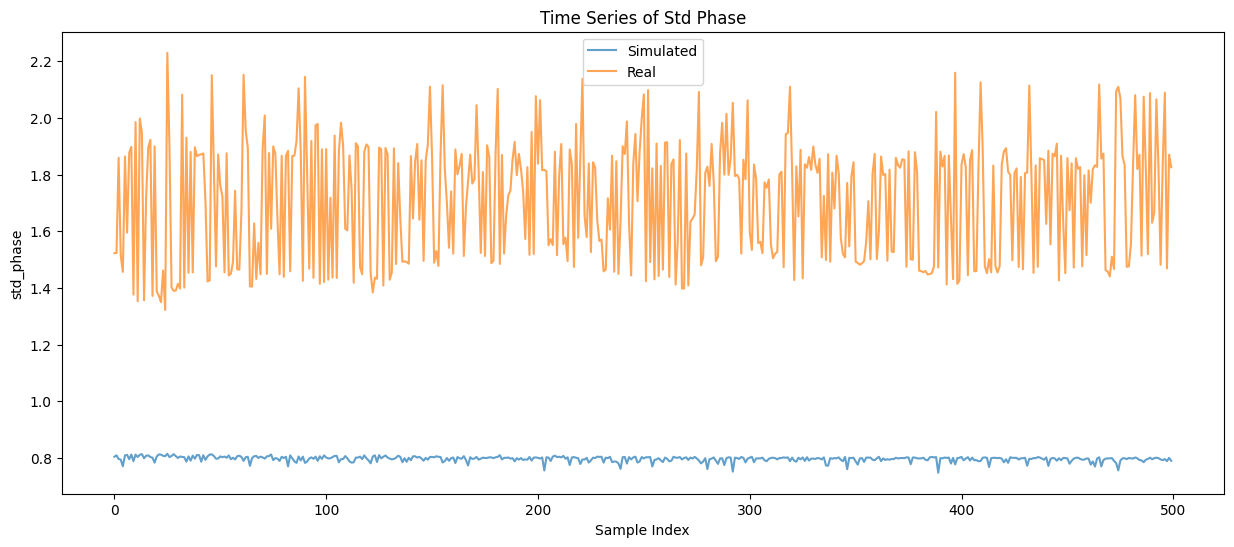

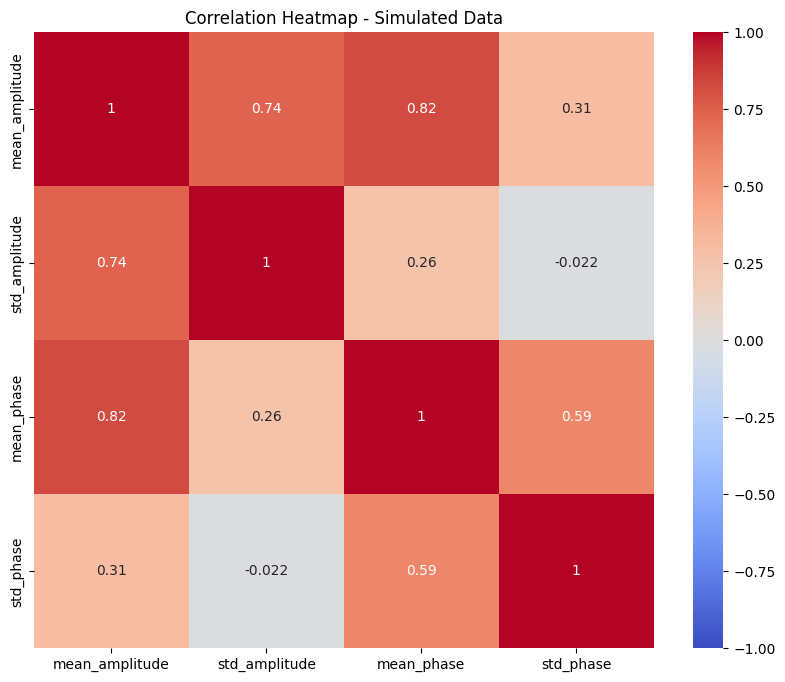

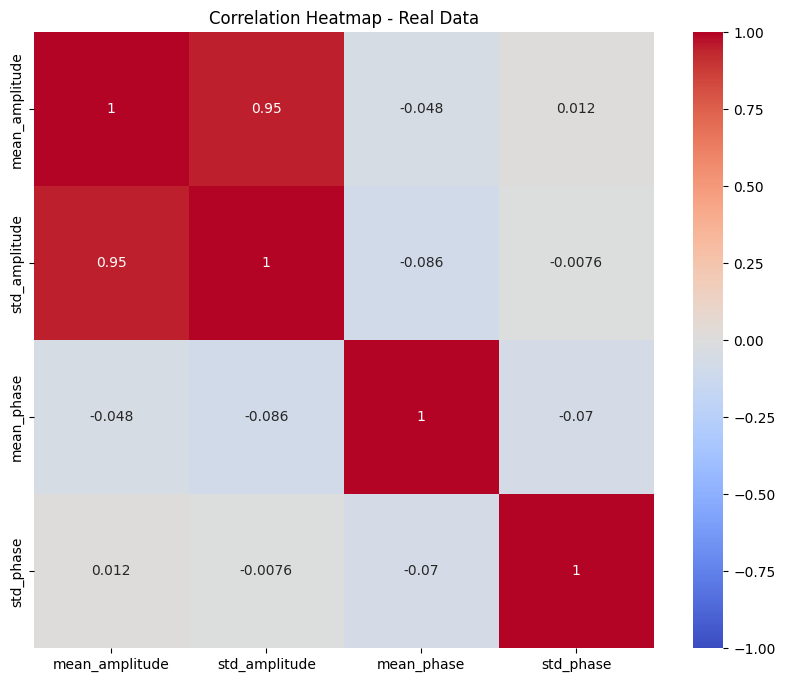

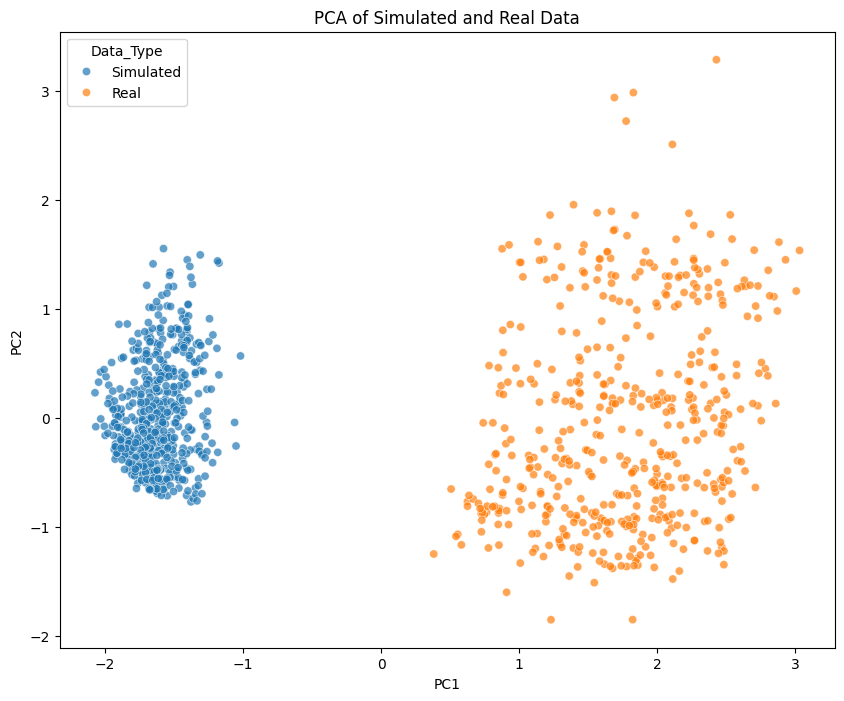

Explained variance ratio:
[0.75419905 0.14099771]
Simulated Data Summary:
       mean_amplitude  std_amplitude  mean_phase   std_phase
count      542.000000     542.000000  542.000000  542.000000
mean        21.931419      22.575402   -0.821922    0.796898
std          2.988992       1.121918    0.088431    0.009477
min         14.234343      19.019046   -1.055047    0.748116
25%         19.867722      21.800066   -0.878980    0.793497
50%         21.835957      22.870086   -0.821116    0.799325
75%         23.947725      23.481440   -0.766444    0.802092
max         29.507223      24.246354   -0.552342    0.815031

Real Data Summary:
       mean_amplitude  std_amplitude  mean_phase   std_phase
count      500.000000     500.000000  500.000000  500.000000
mean        42.931839      18.876747    0.016652    1.710424
std          4.975389       2.212362    0.541589    0.210033
min         23.018246      11.475148   -1.053987    1.322237
25%         40.113696      17.342502   -0.449714    

In [ ]:
# Assuming simulated_data and real_data are already loaded

def extract_features(df):
    features = pd.DataFrame()
    features['mean_amplitude'] = df.abs().mean(axis=1)
    features['std_amplitude'] = df.abs().std(axis=1)
    features['mean_phase'] = df.apply(lambda x: np.angle(x).mean(), axis=1)
    features['std_phase'] = df.apply(lambda x: np.angle(x).std(), axis=1)
    return features

sim_features = extract_features(simulated_data)
real_features = extract_features(real_data)

def plot_distributions(sim_data, real_data, feature, title):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(sim_data[feature], label='Simulated', fill=True)
    sns.kdeplot(real_data[feature], label='Real', fill=True)
    plt.title(f'Distribution of {title}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot distributions
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    plot_distributions(sim_features, real_features, feature, feature.replace('_', ' ').title())

def compare_statistics(sim_data, real_data, feature):
    sim_mean = sim_data[feature].mean()
    real_mean = real_data[feature].mean()
    sim_std = sim_data[feature].std()
    real_std = real_data[feature].std()

    print(f"Statistics for {feature}:")
    print(f"Simulated - Mean: {sim_mean:.4f}, Std: {sim_std:.4f}")
    print(f"Real      - Mean: {real_mean:.4f}, Std: {real_std:.4f}")
    print(f"Difference - Mean: {abs(sim_mean - real_mean):.4f}, Std: {abs(sim_std - real_std):.4f}")
    print()

# Compare statistics
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    compare_statistics(sim_features, real_features, feature)

def kolmogorov_smirnov_test(sim_data, real_data, feature):
    ks_statistic, p_value = stats.ks_2samp(sim_data[feature], real_data[feature])
    print(f"Kolmogorov-Smirnov test for {feature}:")
    print(f"KS statistic: {ks_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("Null hypothesis: Two samples are drawn from the same distribution")
    print(f"{'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis at 5% significance level")
    print()

# Perform Kolmogorov-Smirnov test
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    kolmogorov_smirnov_test(sim_features, real_features, feature)

def plot_time_series(sim_data, real_data, feature, title):
    plt.figure(figsize=(15, 6))
    plt.plot(sim_data.index[:500], sim_data[feature][:500], label='Simulated', alpha=0.7)
    plt.plot(real_data.index[:500], real_data[feature][:500], label='Real', alpha=0.7)
    plt.title(f'Time Series of {title}')
    plt.xlabel('Sample Index')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Plot time series
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    plot_time_series(sim_features, real_features, feature, feature.replace('_', ' ').title())

def plot_correlation_heatmap(data, title):
    corr = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap - {title}')
    plt.show()

# Plot correlation heatmaps
plot_correlation_heatmap(sim_features, 'Simulated Data')
plot_correlation_heatmap(real_features, 'Real Data')

def plot_pca(sim_data, real_data):
    # Combine the datasets
    combined_data = pd.concat([sim_data, real_data])

    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_data)

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    # Create a DataFrame with PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df['Data_Type'] = ['Simulated'] * len(sim_data) + ['Real'] * len(real_data)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Data_Type', alpha=0.7)
    plt.title('PCA of Simulated and Real Data')
    plt.show()

    # Print explained variance ratio
    print("Explained variance ratio:")
    print(pca.explained_variance_ratio_)

# Perform PCA
plot_pca(sim_features, real_features)

# Print summary statistics
print("Simulated Data Summary:")
print(sim_features.describe())
print("\nReal Data Summary:")
print(real_features.describe())

# Calculate and print the range of values for each feature
for feature in ['mean_amplitude', 'std_amplitude', 'mean_phase', 'std_phase']:
    sim_range = sim_features[feature].max() - sim_features[feature].min()
    real_range = real_features[feature].max() - real_features[feature].min()
    print(f"\nRange of {feature}:")
    print(f"Simulated: {sim_range:.4f}")
    print(f"Real: {real_range:.4f}")
    print(f"Difference: {abs(sim_range - real_range):.4f}")

Let's analyze the accuracy of the simulated data compared to the real-time data:

1. PCA Analysis:
   - There is still a clear separation between simulated and real data points, indicating that the overall statistical properties of the simulated data differ from the real data.
   - However, the simulated data cluster has moved closer to the real data cluster compared to previous versions, showing some improvement.

2. Correlation Heatmaps:
   - Simulated Data: Shows strong correlation (0.74) between mean_amplitude and std_amplitude, which is closer to the real data (0.95) than before.
   - The correlation between mean_amplitude and mean_phase (0.82) in the simulated data is not present in the real data, indicating a discrepancy in phase modeling.
   - The correlation structure in the simulated data is generally different from the real data, especially for phase-related features.

3. Time Series of Std Phase:
   - The simulated data (blue) still shows much lower variability compared to the real data (orange).
   - The real data fluctuates between about 1.4 and 2.2, while the simulated data stays mostly around 0.8.

4. Statistical Comparisons:
   - Mean Amplitude: Simulated (21.9314) vs Real (42.9318) - Still significantly different, but closer than before
   - Std Amplitude: Simulated (22.5754) vs Real (18.8767) - Closer, but still overestimated
   - Mean Phase: Simulated (-0.8219) vs Real (0.0167) - Significant difference
   - Std Phase: Simulated (0.7969) vs Real (1.7104) - Still underestimated

5. Kolmogorov-Smirnov Tests:
   - All tests reject the null hypothesis, indicating that the distributions of all features in the simulated data are still significantly different from the real data.

6. Range Comparisons:
   - The ranges of all features in the simulated data are smaller than in the real data, indicating less variability in the simulation.

Conclusion:
While some improvements have been made, the current simulation still does not accurately reproduce the characteristics of the real-time data. The main issues are:

1. Scale: The simulated amplitudes are closer but still different from the real data.
2. Variability: The simulated data shows less variability in both amplitude and phase compared to the real data.
3. Phase Characteristics: The phase information in the simulated data doesn't match the patterns seen in the real data.
4. Correlation Structure: The relationships between features in the simulated data do not match those in the real data, especially for phase-related features.

To further improve the accuracy:

1. Adjust the amplitude scaling to better match the range of the real data (approximately 23-50 for mean amplitude).
2. Increase the variability in both amplitude and phase in the simulation, particularly for the standard deviation of phase.
3. Refine the phase generation to better match the distribution and time series characteristics of the real data. The mean phase should be centered around 0 instead of -0.8.
4. Adjust the correlation structure between different features to more closely match the real data, especially the relationships involving phase.
5. Implement more complex environmental factors or signal processing effects that might be present in the real data but missing from the simulation.

In summary, while the simulation has improved in some aspects (e.g., closer amplitude range), it still needs significant refinements to accurately represent the real-time CSI data for human activity recognition. Focus on improving phase modeling, increasing variability, and adjusting the correlation structure between features.